# **HOTEL BOOKING DEMAND**

## **Table Of Contents**

1. Business Problem Understanding
2. Data Understanding 
3. Data Cleaning
4. Modeling
5. Conclusion
6. Reccomendation

****

# **Business Problem Understanding**

**Background**

Industri perhotelan, terutama hotel dan penyedia akomodasi, terus menghadapi tantangan yang signifikan dalam mengantisipasi dan mengelola pembatalan reservasi. Ketidakakuratan dalam meramalkan dapat menyebabkan dampak serius, seperti kerugian finansial, ketidaknyamanan operasional, dan berpotensi merugikan kepuasan pelanggan. Menanggulangi masalah pembatalan reservasi menjadi suatu hal yang sangat vital untuk mengoptimalkan pemanfaatan sumber daya dan memberikan pengalaman yang lancar bagi para tamu.

**Problem Statement**

Masalah yang dihadapi adalah upaya untuk mengurangi jumlah pelanggan yang pada kenyataannya membatalkan pemesanan (pembayaran), tetapi dalam prediksi dianggap berhasil melakukan pemesanan (pembayaran). Kesalahan semacam ini dapat berdampak serius pada keseimbangan keuangan dan efisiensi operasional hotel.

0: Transkasi Completed

1: Transaction Canceled

**Goals**

Meningkatkan Akurasi Prediksi
- Mengembangkan model prediktif yang lebih akurat untuk mengidentifikasi pelanggan yang benar-benar melakukan pembatalan, tetapi pada awalnya diprediksi berhasil melakukan pemesanan.
Optimalkan Alokasi Sumber Daya
- Mengurangi kesalahan prediksi, diharapkan hotel dapat mengoptimalkan alokasi sumber daya, termasuk penjadwalan staf dan manajemen inventaris kamar, sehingga mengurangi dampak operasional dari pembatalan yang tidak terduga.
Minimalkan Kerugian Finansial
- Mengurangi jumlah pelanggan yang sebenarnya membatalkan pemesanan namun diprediksi berhasil dapat membantu hotel mengurangi kerugian finansial yang disebabkan oleh pelanggan yang tercatat sudah membayar namun sebenarnya belum melakukan pembayaran.

**Analytic Aprroach**

Akan dibangun model klasifikasi untuk memprediksi probabilitas pelanggan yang berhasil menyelesaikan transaksi sebagai pembatalan transaksi.

**Metric Evaluation**

False Negative (FN): Jumlah prediksi yang salah bahwa pelanggan berhasil melakukan transaksi namun actualnya membatalkan tansaksi. FN terjadi ketika model gagal mengidentifikasi pelanggan yang sebenarnya membatalkan transaksi. Jika jumlah FN tinggi, hal ini dapat mengakibatkan beberapa konsekuensi yang tidak diinginkan, seperti:

- Kekosongan Kamar yang Tidak Terduga: Jika pelanggan yang sebenarnya membatalkan diabaikan oleh model, hotel mungkin tidak mempersiapkan kamar tambahan atau menyediakan layanan yang sesuai, menyebabkan kekosongan kamar yang tidak terduga.
- Kerugian Finansial: Hotel mungkin telah menyiapkan sumber daya dan layanan untuk pelanggan yang pada akhirnya tidak datang, menyebabkan kerugian finansial yang dapat dihindari.
- Dampak Operasional: Kegagalan dalam mengantisipasi pembatalan dapat menyebabkan ketidakefisienan dalam pengelolaan operasional, seperti penjadwalan staf dan manajemen inventaris kamar.

Recall: Fokus diberikan pada meningkatkan kemampuan model untuk mendeteksi sebanyak mungkin kasus positif yang sebenarnya (pembatalan). Tujuannya adalah untuk meminimalkan jumlah FN, sehingga model dapat lebih baik mengidentifikasi pelanggan yang benar-benar membatalkan pemesanan.





https://www.google.com/url?sa=i&url=https%3A%2F%2Ftwitter.com%2Fkdnuggets%2Fstatus%2F1458499206482649091%3Flang%3Did&psig=AOvVaw3EVyIwRPaXG-pdbt3tUjbe&ust=1699973633068000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCPjElLadwYIDFQAAAAAdAAAAABAZ

# **Data Understanding**

Dataset source: https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL
|no|Features|Description|
|---|---|---|
|1|country| Country of origin of the customer making the booking.|
|2|market_segment| Designation of the market segment to which the booking belongs. This could include segments like 'Groups,' 'Corporate,' 'Online TA/TO' (Travel Agents/Tour Operators), etc.|
|3|previous_cancellations| The number of previous bookings that were canceled by the customer prior to the current booking. It provides insight into the cancellation history of the customer.|
|4|booking_changes| Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|5|deposit_type| Indication on if the customer made a deposit to guarantee the booking| 
|6|days_in_waiting_list| Number of days the booking was in the waiting list before it was confirmed to the customer|
|7|customer_type| Type of booking, such as 'Transient' (normal booking), 'Transient-Party' (group booking), 'Contract' (associated with a contract or agreement), or 'Group' (group booking).|
|8|reserved_room_type| Code of room type reserved Code is presented instead of designation for anonymity reasons|
|9|required_car_parking_space| Number of car parking spaces required by the customer|
|10|total_of_special_request| Number of special requests made by the customer (e.g twin bed or high floor)|
|11|is_canceled| Value indicating if the booking was canceled (1) or not (0)|

## **Library**


In [228]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from phik import phik_matrix
from tqdm.notebook import tqdm

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # scaling
from sklearn.experimental import enable_iterative_imputer                    # imputasi missing value
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer       # imputasi missing value
from sklearn.preprocessing import KBinsDiscretizer                           # binning
from sklearn.preprocessing import PolynomialFeatures                         # generate new features
from sklearn.base import is_classifier

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## **Load Data Set**


In [2]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df.head()

country market_segment  previous_cancellations  booking_changes  \
0     IRL  Offline TA/TO                       0                0   
1     FRA      Online TA                       0                0   
2     PRT      Online TA                       0                1   
3     NLD      Online TA                       0                0   
4     PRT      Online TA                       0                2   

  deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
0   No Deposit                     0  Transient-Party                  A   
1   No Deposit                     0        Transient                  A   
2   No Deposit                     0        Transient                  A   
3   No Deposit                     0        Transient                  A   
4   No Deposit                     0        Transient                  A   

   required_car_parking_spaces  total_of_special_requests  is_canceled  
0                            0                          0            0  
1                            0                          2            0  
2                            0                          2            0  
3                            0                          1            1  
4                            0                          2            0

# **Data Cleaning**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


## **Handling Missing Values**

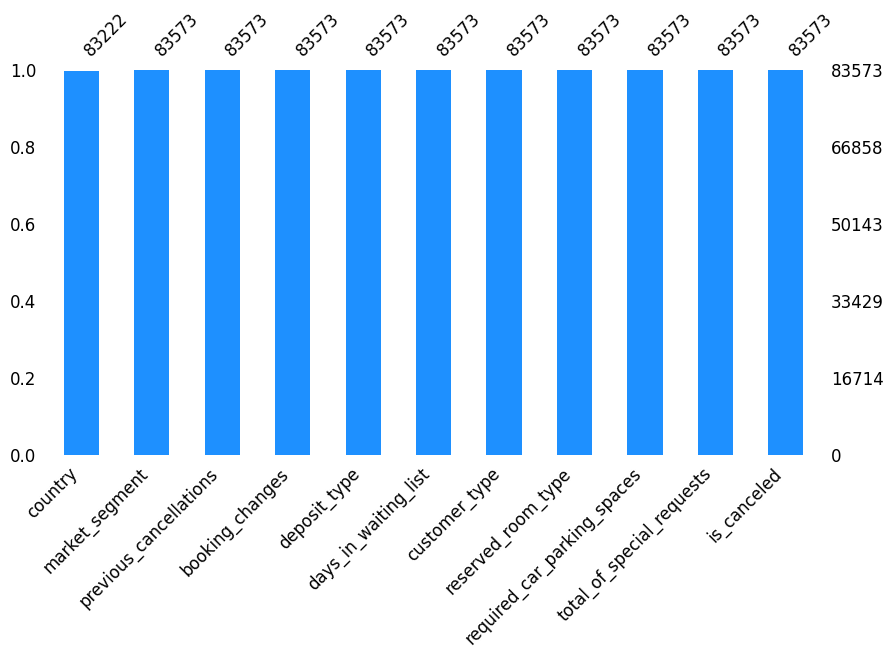

In [4]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);


In [5]:
df['country'].fillna(df.country.mode().to_string(), inplace=True)

## **Handling Duplicates**

In [6]:
df.shape

(83573, 11)

ditemukan sebanyak 83573 values yang duplikat

In [7]:
df.duplicated().sum()

73371

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(10202, 11)

hasil dari pengahpusan duplikat

## **Handling Outlier**

**Handling Outliers Days In Waiting List**

<br>
Sejumlah besar pelanggan harus menunggu lebih dari 100 hari. Ini menunjukkan bahwa ada sebagian pelanggan yang menghadapi waktu tunggu yang panjang sebelum pemesanan mereka dikonfirmasi. Hal ini mungkin menjadi perhatian, karena waktu tunggu yang diperpanjang dapat berpotensi memengaruhi kepuasan pelanggan dan mungkin memerlukan penyelidikan lebih lanjut terhadap alasan di balik keterlambatan tersebut. Pelanggan yang menunggu lebih dari 100 hari dapat dianggap sebagai outlier, karena mereka mewakili sebagian kecil dari total dan secara substansial berbeda dari periode tunggu typikal.

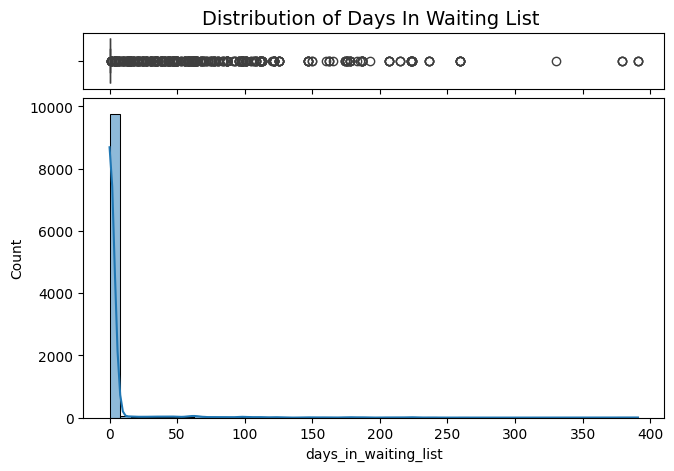

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})


ax1.set_title(f"Distribution of Days In Waiting List ", color = "black", size = 14)
sns.boxplot(x = df['days_in_waiting_list'], ax = ax1)
ax1.set(xlabel = "")

sns.set_palette('mako')
sns.histplot(data = df['days_in_waiting_list'], ax = ax2, kde=True, bins=50)

plt.show()

In [11]:
df[df['days_in_waiting_list'] >=50]

country market_segment  previous_cancellations  booking_changes  \
64        PRT         Groups                       0                2   
93        PRT  Offline TA/TO                       0                0   
110       PRT  Offline TA/TO                       0                0   
191       PRT         Groups                       0                0   
281       PRT  Offline TA/TO                       0                0   
...       ...            ...                     ...              ...   
80255     BEL         Groups                       0                1   
81045     PRT         Groups                       0                0   
81378     DEU         Direct                       0                1   
81965     DEU  Offline TA/TO                       0                1   
82772     GRC  Offline TA/TO                       0                1   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
64      No Deposit                    87  Transient-Party                  A   
93      Non Refund                    77        Transient                  A   
110     No Deposit                   215  Transient-Party                  A   
191     No Deposit                    97  Transient-Party                  A   
281     No Deposit                   162  Transient-Party                  A   
...            ...                   ...              ...                ...   
80255   No Deposit                   185  Transient-Party                  D   
81045   No Deposit                   122        Transient                  A   
81378   No Deposit                    93  Transient-Party                  D   
81965   No Deposit                    99  Transient-Party                  A   
82772   No Deposit                    63  Transient-Party                  A   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
64                               0                          0            0  
93                               0                          0            1  
110                              0                          0            1  
191                              0                          1            0  
281                              0                          0            1  
...                            ...                        ...          ...  
80255                            0                          0            0  
81045                            0                          0            0  
81378                            1                          0            0  
81965                            0                          0            0  
82772                            0                          0            0  

[268 rows x 11 columns]

In [12]:
df.drop(df[df['days_in_waiting_list'] >= 100].index, inplace=True)

### **Handling Outliers Previous Cancelation**

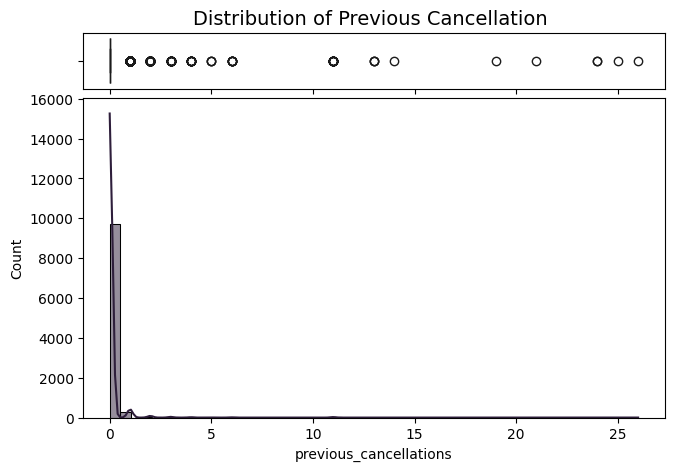

In [13]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})


ax1.set_title(f"Distribution of Previous Cancellation ", color = "black", size = 14)
sns.boxplot(x = df['previous_cancellations'], ax = ax1)
ax1.set(xlabel = "")

sns.set_palette('mako')
sns.histplot(data = df['previous_cancellations'], ax = ax2, kde=True, bins=50)

plt.show()

In [14]:
df[df['previous_cancellations'] >=10]

country market_segment  previous_cancellations  booking_changes  \
544       PRT         Groups                      25                0   
1356      PRT      Online TA                      11                0   
1618      PRT         Groups                      24                0   
2603      PRT  Offline TA/TO                      13                0   
3279      IRL         Groups                      24                0   
4513      PRT  Offline TA/TO                      26                0   
5267      BEL         Groups                      14                0   
6062      PRT      Online TA                      11                0   
7525      PRT  Offline TA/TO                      19                0   
11712     POL      Online TA                      11                0   
13592     FRA      Online TA                      11                0   
13984     PRT         Groups                      13                0   
15226     PRT      Online TA                      11                0   
23813     ESP      Online TA                      11                0   
24118     FRA         Direct                      13                1   
34795     AGO      Online TA                      11                0   
35108     PRT         Groups                      11                0   
36063     ESP      Online TA                      11                1   
38399     PRT      Online TA                      11                0   
53809     DEU      Online TA                      11                0   
60949     PER      Online TA                      11                0   
61303     BRA      Online TA                      11                0   
65640     PRT         Groups                      21                0   
65781     PRT         Direct                      11                0   
80030     PRT      Online TA                      11                1   
83458     FRA      Online TA                      11                0   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
544     Non Refund                     0        Transient                  A   
1356    No Deposit                     0        Transient                  A   
1618    Non Refund                     0        Transient                  A   
2603    No Deposit                    31  Transient-Party                  A   
3279    No Deposit                     0  Transient-Party                  A   
4513    Non Refund                     0        Transient                  A   
5267    Non Refund                     0        Transient                  A   
6062    No Deposit                     0        Transient                  A   
7525    Non Refund                     0        Transient                  A   
11712   No Deposit                     0        Transient                  A   
13592   No Deposit                     0        Transient                  D   
13984   No Deposit                    31  Transient-Party                  A   
15226   No Deposit                     0        Transient                  D   
23813   No Deposit                     0        Transient                  A   
24118   No Deposit                     0        Transient                  D   
34795   No Deposit                     0        Transient                  A   
35108   No Deposit                    31  Transient-Party                  A   
36063   No Deposit                     0        Transient                  D   
38399   No Deposit                     0        Transient                  A   
53809   No Deposit                     0        Transient                  A   
60949   No Deposit                     0        Transient                  A   
61303   No Deposit                     0  Transient-Party                  A   
65640   No Deposit                     0  Transient-Party                  A   
65781   No Deposit                     0        Transient                  E   
80030   No Deposit                

In [15]:
df.drop(df[df['previous_cancellations'] >= 10].index, inplace=True)

### **Handling Outliers Required Parking Spaces**

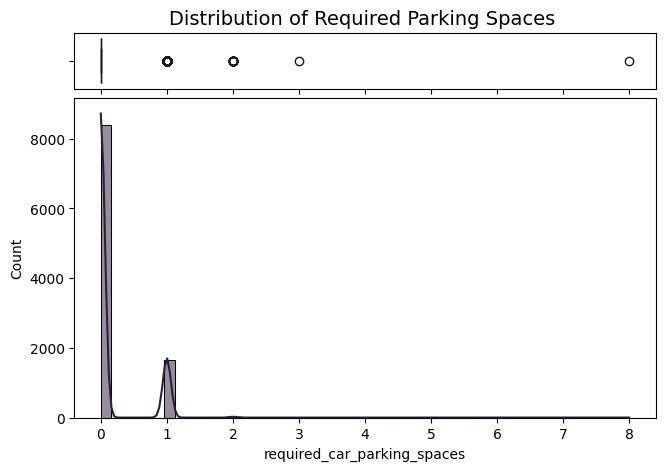

In [16]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})


ax1.set_title(f"Distribution of Required Parking Spaces ", color = "black", size = 14)
sns.boxplot(x = df['required_car_parking_spaces'], ax = ax1)
ax1.set(xlabel = "")

sns.set_palette('mako')
sns.histplot(data = df['required_car_parking_spaces'], ax = ax2, kde=True, bins=50)

plt.show()

In [17]:
df[df['required_car_parking_spaces']>= 3]

country market_segment  previous_cancellations  booking_changes  \
26977     ESP      Online TA                       0                0   
35802     AUT         Direct                       0                1   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
26977   No Deposit                     0  Transient-Party                  A   
35802   No Deposit                     0  Transient-Party                  E   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
26977                            3                          2            0  
35802                            8                          1            0

In [18]:
df.drop(df[df['required_car_parking_spaces'] == 8].index, inplace=True)

In [19]:
df['reserved_room_type'].value_counts()

reserved_room_type
A    4503
D    2033
E    1257
F     720
G     553
B     453
C     340
H     192
P       4
L       2
Name: count, dtype: int64

In [20]:
df = df[(df['reserved_room_type'] != 'L') & (df['reserved_room_type'] != 'P') ]


In [21]:
df.columns

Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

In [22]:
df['market_segment'].value_counts()

market_segment
Online TA        4930
Direct           2128
Offline TA/TO    1419
Groups            785
Corporate         527
Complementary     180
Aviation           81
Undefined           1
Name: count, dtype: int64

In [23]:
df = df[df['market_segment'] != 'Undefined']

In [24]:
df['market_segment'].value_counts()

market_segment
Online TA        4930
Direct           2128
Offline TA/TO    1419
Groups            785
Corporate         527
Complementary     180
Aviation           81
Name: count, dtype: int64

In [25]:
df['country'].value_counts()

country
PRT    1915
GBR     722
ESP     638
FRA     597
DEU     419
       ... 
RWA       1
NIC       1
CYM       1
SLE       1
AIA       1
Name: count, Length: 163, dtype: int64

In [26]:
country_count = df.groupby('country').agg({'country' : 'count'})

In [27]:
country_1 =country_count[country_count['country']==1].index
country_1

Index(['AIA', 'ATA', 'BDI', 'BEN', 'BFA', 'BRB', 'BWA', 'CYM', 'DMA', 'GLP',
       'GTM', 'KHM', 'KIR', 'KNA', 'LAO', 'LCA', 'MLI', 'MMR', 'MWI', 'MYT',
       'NCL', 'NIC', 'PLW', 'RWA', 'SDN', 'SLE', 'SYC', 'UGA', 'UMI', 'VGB',
       'ZMB'],
      dtype='object', name='country')

In [28]:
df = df[~df['country'].isin(country_1)]

# **Exploratory Data Analysis**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 83565
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      10019 non-null  object
 1   market_segment               10019 non-null  object
 2   previous_cancellations       10019 non-null  int64 
 3   booking_changes              10019 non-null  int64 
 4   deposit_type                 10019 non-null  object
 5   days_in_waiting_list         10019 non-null  int64 
 6   customer_type                10019 non-null  object
 7   reserved_room_type           10019 non-null  object
 8   required_car_parking_spaces  10019 non-null  int64 
 9   total_of_special_requests    10019 non-null  int64 
 10  is_canceled                  10019 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 939.3+ KB


In [30]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  uniqueSample
0                       country   object     0      0.0     132         [KOR]
1                market_segment   object     0      0.0       7      [Direct]
2        previous_cancellations    int64     0      0.0       7           [2]
3               booking_changes    int64     0      0.0      19           [7]
4                  deposit_type   object     0      0.0       3  [Refundable]
5          days_in_waiting_list    int64     0      0.0      83          [73]
6                 customer_type   object     0      0.0       4    [Contract]
7            reserved_room_type   object     0      0.0       8           [C]
8   required_car_parking_spaces    int64     0      0.0       4           [2]
9     total_of_special_requests    int64     0      0.0       6           [2]
10                  is_canceled    int64     0      0.0       2           [0]

## **Numerical Variabel**

In [31]:
df.describe().round(0) 

previous_cancellations  booking_changes  days_in_waiting_list  \
count                 10019.0          10019.0               10019.0   
mean                      0.0              1.0                   2.0   
std                       0.0              1.0                  10.0   
min                       0.0              0.0                   0.0   
25%                       0.0              0.0                   0.0   
50%                       0.0              0.0                   0.0   
75%                       0.0              1.0                   0.0   
max                       6.0             21.0                  99.0   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
count                      10019.0                    10019.0      10019.0  
mean                           0.0                        1.0          0.0  
std                            0.0                        1.0          0.0  
min                            0.0                        0.0          0.0  
25%                            0.0                        0.0          0.0  
50%                            0.0                        1.0          0.0  
75%                            0.0                        2.0          0.0  
max                            3.0                        5.0          1.0

### **How many bookings had a number of days in the waiting list?**

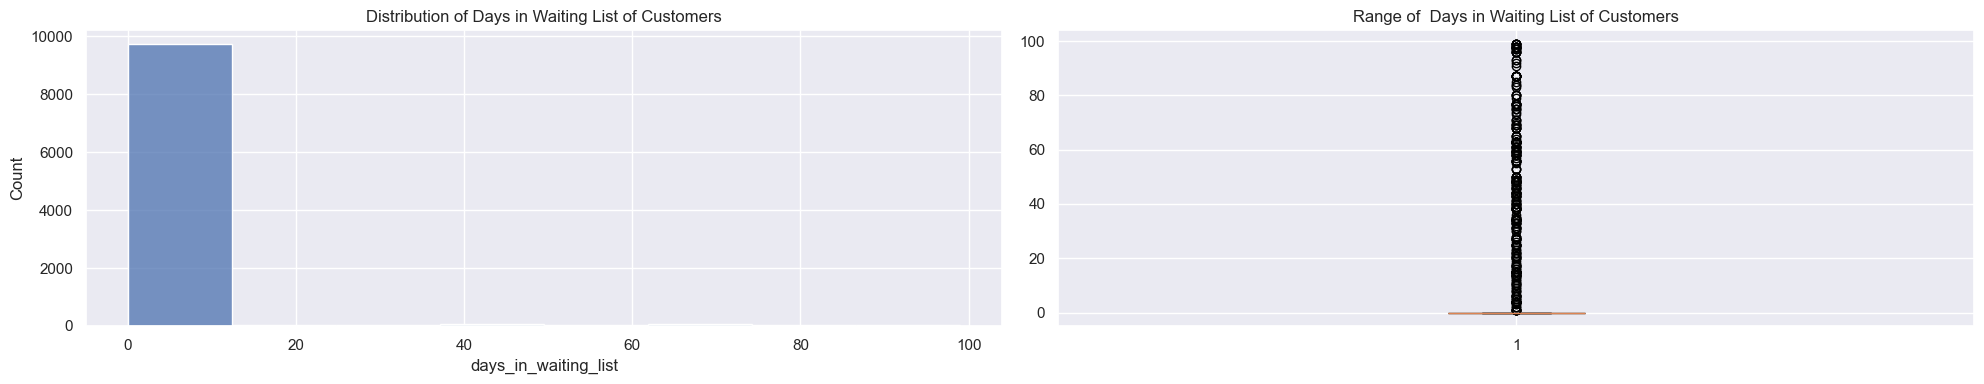

In [32]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1,2, figsize=(20,4))
sns.histplot(df['days_in_waiting_list'],bins=8,ax=axes[0])
plt.boxplot(df['days_in_waiting_list'],patch_artist = True)

axes[0].set_title('Distribution of Days in Waiting List of Customers')
axes[1].set_title('Range of  Days in Waiting List of Customers')

plt.tight_layout()
plt.show()

**Insight**

`Average of Waiting Periods`
<br>
Rata-rata jumlah hari sebuah pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan mengukur periode di mana suatu reservasi menunggu diproses atau dikonfirmasi sebelum menjadi resmi dan dapat diakses oleh pelanggan yang melakukan pemesanan adalah 4 hari.

`Distribution of Waiting Periods`
<br>
Sebagian besar pelanggan (10.000) mengalami periode tunggu dalam rentang 0 hingga 50 hari.

Faktor eksternal yang berkontribusi pada waktu tunggu yang lebih lama:

- Musim Puncak Wisata
- Acara Khusus dan Festival
- Regulasi dan Kebijakan Pemerintah
- Kerjasama dengan Platform Pemesanan
- Efisiensi Sistem Pemesanan


### **What is the overall cancellation rate for hotel bookings?**

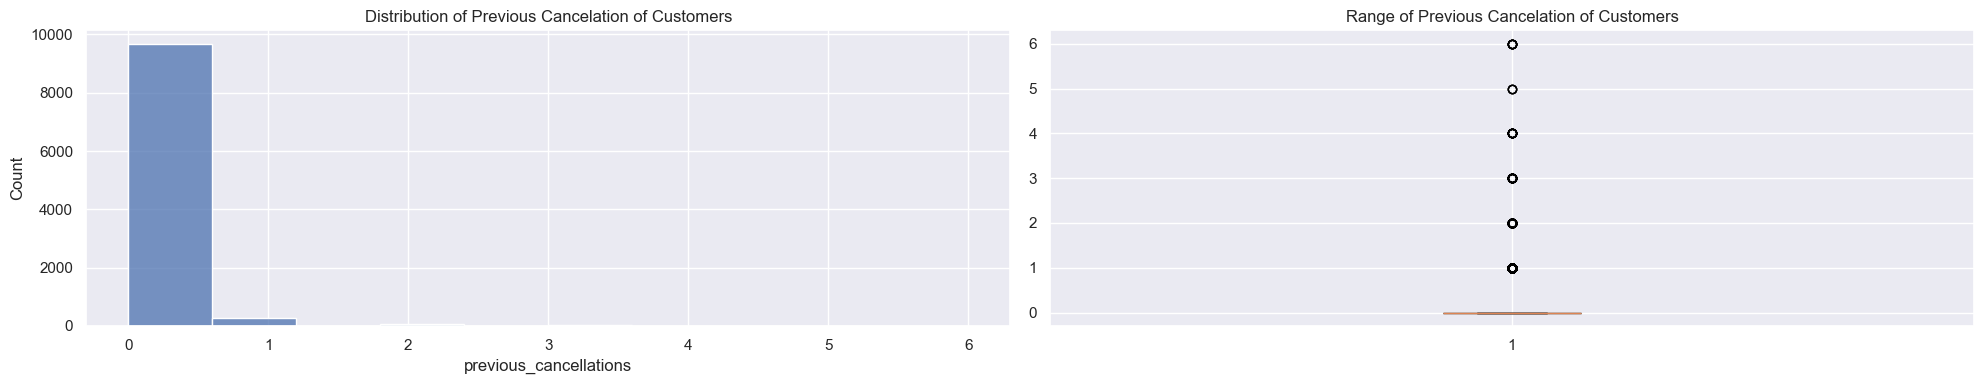

In [33]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1,2, figsize=(20,4))
sns.histplot(df['previous_cancellations'],bins=10,ax=axes[0])
plt.boxplot(df['previous_cancellations'],patch_artist = True)

axes[0].set_title('Distribution of Previous Cancelation of Customers')
axes[1].set_title('Range of Previous Cancelation of Customers')

plt.tight_layout()
plt.show()

In [34]:
df['previous_cancellations'].value_counts().sort_index()

previous_cancellations
0    9655
1     267
2      53
3      23
4      11
5       3
6       7
Name: count, dtype: int64

**Insight**

`Most Common Previous Cancellations`
<br>
- Sebagian besar reservasi (sekitar 98,12%) tidak memiliki riwayat pembatalan sebelumnya ('previous_cancellations' = 0).
- Skenario pembatalan sebelumnya yang paling umum adalah satu pembatalan (267 kasus atau sekitar 2,67% dari total).


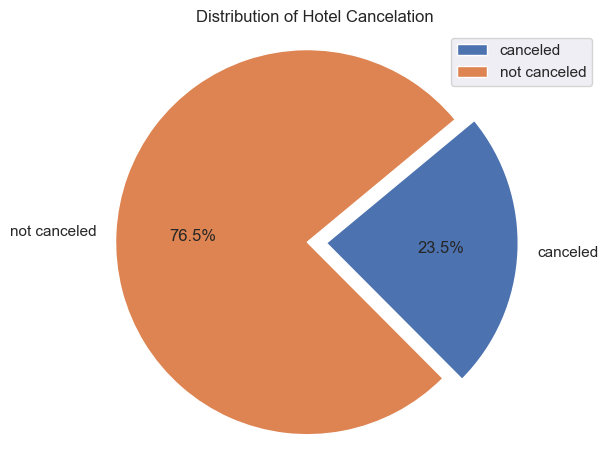

In [35]:
canceled = df.is_canceled[df["is_canceled"]==1].count()
notcancel = df.is_canceled[df['is_canceled']==0].count()

slices = [canceled,notcancel]

plt.pie(slices, labels=['canceled', 'not canceled'],explode = [0, 0.1],
        startangle= -45, autopct='%1.1f%%')
plt.axis('equal') 
plt.title("Distribution of Hotel Cancelation ")
plt.legend()

plt.tight_layout() 
#plt.savefig('distribution of cancelation.jpg')
plt.show()

**Insight**

Jika sebanyak 70% dari pelanggan tidak membatalkan pesanan hotel, ini dapat dianggap sebagai indikasi positif untuk hotel, Tingginya persentase pelanggan yang tidak membatalkan pesanan dapat menunjukkan bahwa pelanggan puas dengan layanan dan fasilitas yang ditawarkan oleh hotel.

### **What is the distribution of the number of total special requests among bookings?**

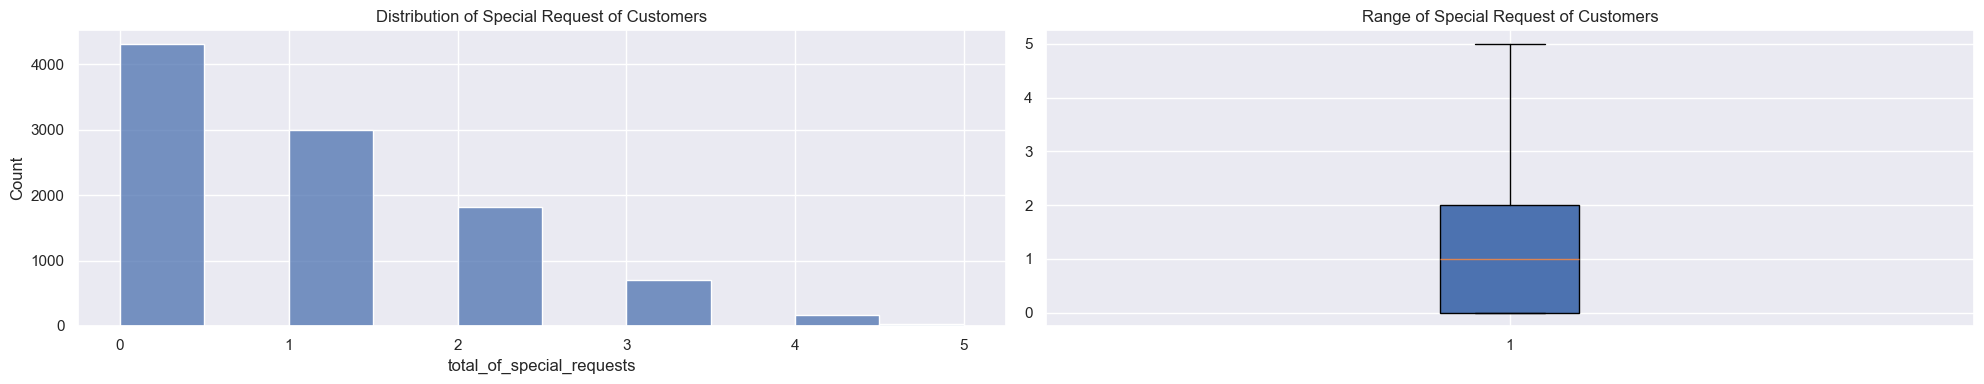

In [36]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1,2, figsize=(20,4))
sns.histplot(df['total_of_special_requests'],bins=10,ax=axes[0])
plt.boxplot(df['total_of_special_requests'],patch_artist = True)

axes[0].set_title('Distribution of Special Request of Customers')
axes[1].set_title('Range of Special Request of Customers')

plt.tight_layout()
plt.show()

In [37]:
special_requests_counts = df['total_of_special_requests'].value_counts()

for value, count in special_requests_counts.items():
    print(f"Count for {value} special request: {count}")


Count for 0 special request: 4305
Count for 1 special request: 2996
Count for 2 special request: 1823
Count for 3 special request: 699
Count for 4 special request: 169
Count for 5 special request: 27


**Insight**

75% (Kuartil 3): Dalam kasus ini, 75% dari pelanggan membuat 2 permintaan khusus atau kurang.

Ini menunjukan bahwa hotel dapat memenuhi permintaan khusus yang berkontribusi pada peningkatan kepuasan pelanggan dan pengalaman yang lebih personal. 


## **Categorical Variabel**

In [38]:
df.describe(include='object').round(0) 

country market_segment deposit_type customer_type reserved_room_type
count    10019          10019        10019         10019              10019
unique     132              7            3             4                  8
top        PRT      Online TA   No Deposit     Transient                  A
freq      1915           4905         9800          6841               4480

In [39]:
numerical_cat = df.select_dtypes(include=['int64'])
numerical_cat.var()

previous_cancellations          0.115749
booking_changes                 1.690125
days_in_waiting_list           93.527590
required_car_parking_spaces     0.144835
total_of_special_requests       1.083554
is_canceled                     0.179715
dtype: float64

**Insight**

Variabel yang memiliki distribusi yang merata atau memiliki variasi yang baik dapat menjadi fitur yang baik untuk dimasukkan ke dalam model.

### **where most customers are come from and from what platforms they booking the hotel?**

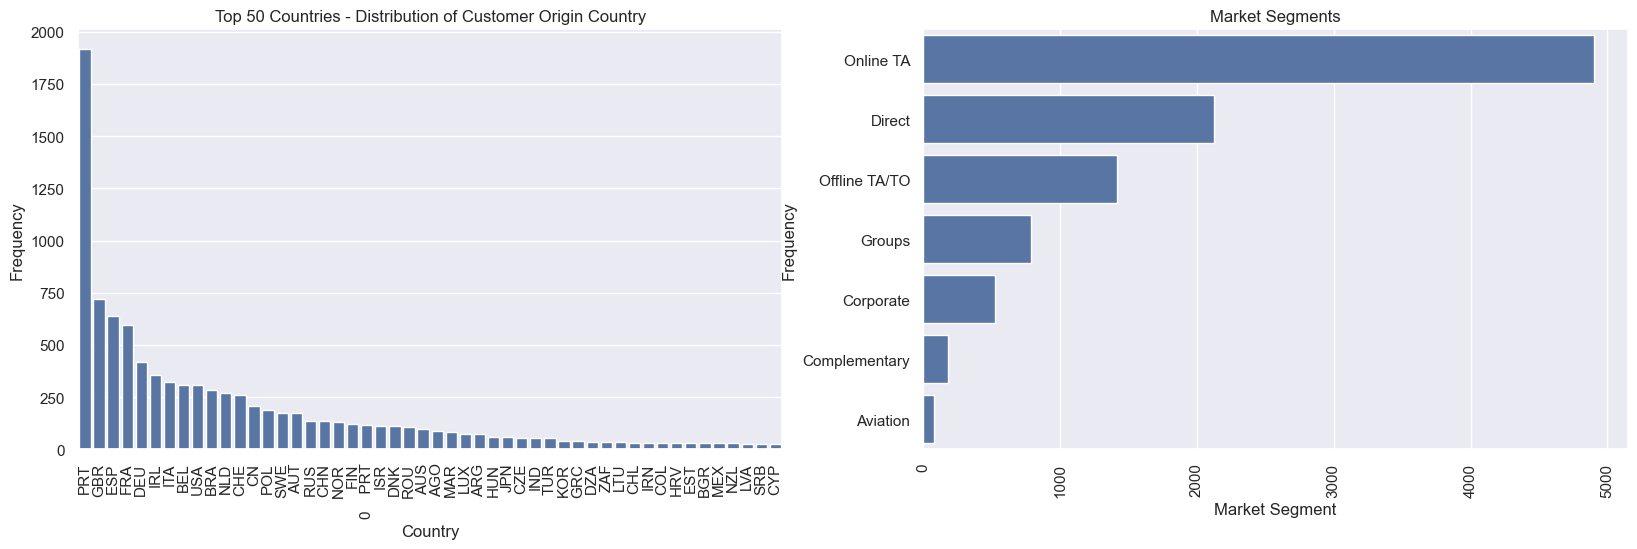

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 12))

top_countries = df['country'].value_counts().nlargest(50)


plt.subplot(2, 2, 1)  
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 50 Countries - Distribution of Customer Origin Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)


market_segment = df['market_segment'].value_counts()

plt.subplot(2, 2, 2)  # Second subplot
sns.barplot(x=market_segment.values, y=market_segment.index)
plt.title('Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=90)


plt.show()


**Insight**

**Customer Origin Countries**

`Top Booking Countries`
<br>
Mengingat bahwa Portugal, Inggris, Spanyol, Prancis, dan Jerman adalah negara-negara dengan jumlah pemesanan tertinggi, upaya pemasaran dapat diarahkan secara strategis ke wilayah-wilayah ini. Mengadaptasi kampanye promosi atau diskon khusus untuk pelanggan dari negara-negara ini dapat meningkatkan tingkat pemesanan.

`European Dominance`
<br>
Memahami dominasi negara-negara Eropa menunjukkan potensi untuk menyediakan layanan lokal. Menawarkan informasi dalam beberapa bahasa dan mengakomodasi preferensi budaya dalam layanan dapat meningkatkan pengalaman pelanggan secara keseluruhan.

**Market Segment**

`Online Travel Agencies (Online TA)`
<br>
Popularitas Online TA menunjukkan pentingnya mempertahankan kehadiran online yang kuat. Hotel sebaiknya berinvestasi dalam situs web yang ramah pengguna, bermitra dengan agen perjalanan online, dan memanfaatkan media sosial untuk menarik pemesanan online.

`Direct`
<br>
Karena pemesanan langsung sangat penting, hotel dapat menerapkan program loyalitas, diskon eksklusif, atau manfaat tambahan bagi pelanggan yang memilih untuk memesan langsung melalui situs web hotel. Pendekatan ini dapat membantu membangun basis pelanggan langsung dan setia.

`Offline Travel Agents/ Tour Operators (Offline TA/TO)`
<br>
Mengakui keberadaan pelanggan yang lebih suka saluran offline menunjukkan pentingnya menjaga hubungan dengan agen perjalanan offline. Kerja sama dengan agen perjalanan atau operator tur offline dapat membuka peluang pemesanan tambahan.

`Groups and Corporate Bookings`
<br>
Dengan pemesanan kelompok dan perusahaan yang signifikan, hotel harus fokus pada penyediaan layanan khusus untuk pelancong bisnis. Menawarkan ruang pertemuan, fasilitas konferensi, dan fasilitas ramah bisnis dapat menarik lebih banyak pemesanan dari segmen korporat.


### **What type of room customers like?**

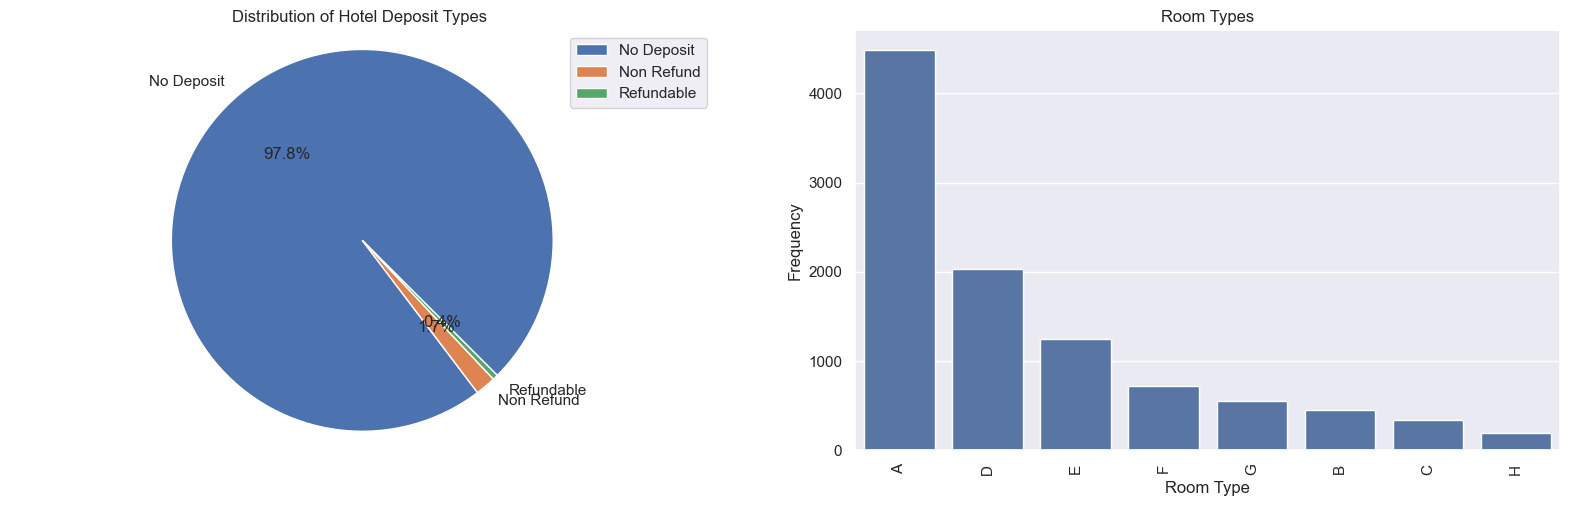

In [41]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 12))


plt.subplot(2, 2, 1)  # First subplot
No_Deposit = df[df["deposit_type"]=='No Deposit'].count()['deposit_type']
Non_refund = df[df['deposit_type']=='Non Refund'].count()['deposit_type']
Refundable = df[df['deposit_type']=='Refundable'].count()['deposit_type']

deposit_counts = [No_Deposit, Non_refund, Refundable]

plt.pie(deposit_counts, labels=['No Deposit', 'Non Refund', 'Refundable'], startangle= -45, autopct='%1.1f%%')
plt.axis('equal') 
plt.title("Distribution of Hotel Deposit Types ")
plt.legend()

plt.subplot(2, 2, 2) 
room_type = df['reserved_room_type'].value_counts()
sns.barplot(x=room_type.index, y=room_type.values)
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [42]:
print(f'number of customer with no deposit', No_Deposit)
print(f'number of customer with non refund', Non_refund)
print(f'number of customer with refundable', Refundable)

number of customer with no deposit 9800
number of customer with non refund 174
number of customer with refundable 45


**Insight**

`Menarik Pelanggan dengan Penawaran Tanpa Deposit`

- Hotel mungkin menggunakan strategi ini untuk menarik pelanggan dan memberikan insentif bagi mereka untuk melakukan pemesanan. Tanpa deposit, pelanggan mungkin lebih cenderung membuat reservasi karena mereka tidak perlu melakukan pembayaran di muka.

`Mengurangi Hambatan Finansial Pelanggan`
- Pembayaran deposit dapat menjadi hambatan finansial bagi beberapa pelanggan. Dengan menghapus deposit, hotel dapat membuat proses pemesanan lebih mudah dan lebih cepat, mengurangi hambatan finansial yang mungkin mencegah pelanggan untuk melakukan pemesanan.

`Menyesuaikan Diri dengan Tren Pasar`
- Jika tren pasar menunjukkan bahwa pelanggan lebih suka pemesanan tanpa deposit, hotel dapat menyesuaikan strategi mereka untuk mencocokkan preferensi pelanggan. Hal ini dapat meningkatkan daya saing dan daya tarik hotel di pasar.

`Meningkatkan Tingkat Pemesanan`
- Penawaran tanpa deposit dapat meningkatkan tingkat pemesanan dan mengurangi tingkat pembatalan. Pelanggan mungkin lebih cenderung membuat reservasi jika mereka tidak diharuskan membayar deposit di muka.

`Promosi dan Marketing`
- Hotel mungkin menggunakan pemesanan tanpa deposit sebagai bagian dari strategi pemasaran mereka. Hal ini dapat menciptakan persepsi bahwa hotel bersedia memberikan fleksibilitas kepada pelanggan.

# **Data Analysis**

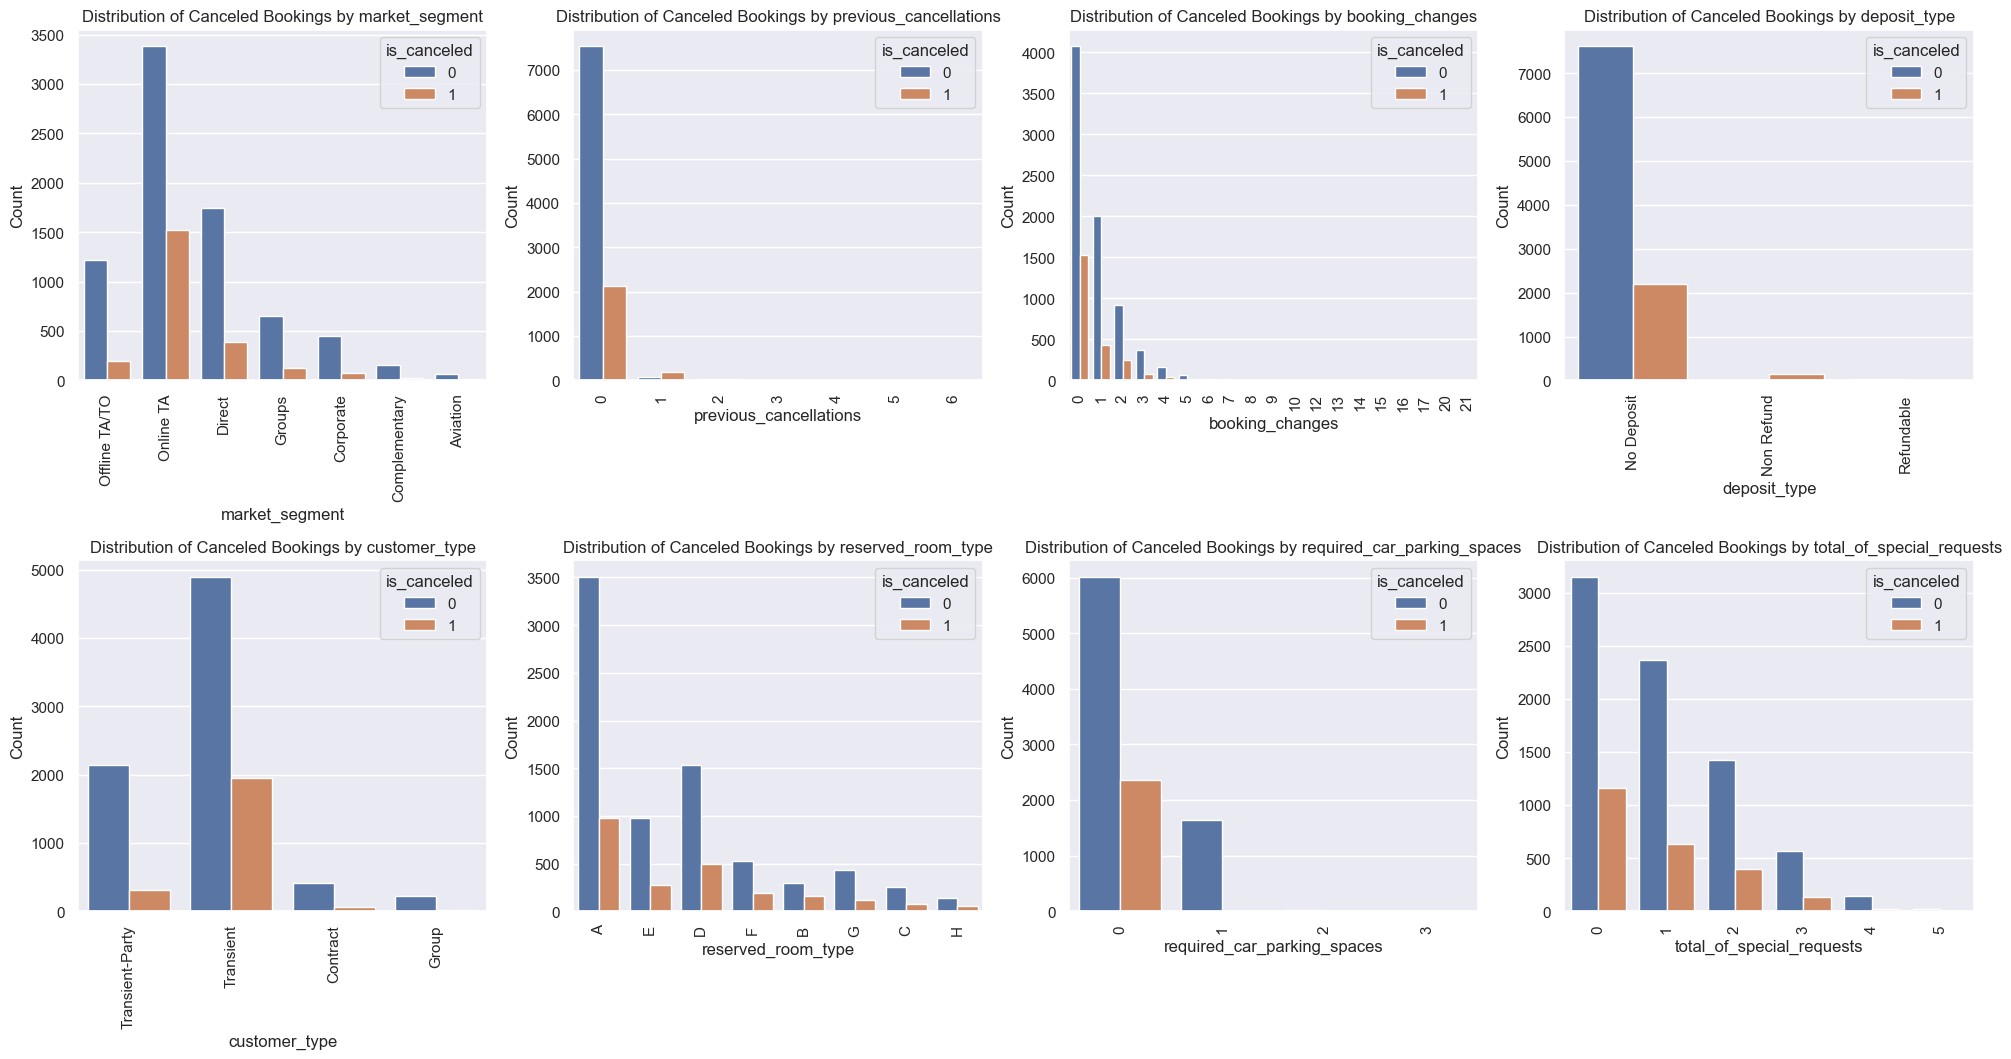

In [43]:
fig = plt.figure(figsize=(20, 20))

columns_to_plot = ['market_segment', 'previous_cancellations',
                   'booking_changes', 'deposit_type',
                   'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
                   'total_of_special_requests']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)  #
    sns.countplot(x=column, hue='is_canceled', data=df)
    plt.title(f'Distribution of Canceled Bookings by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='is_canceled')

fig.tight_layout()
plt.show()


**Insight**

Dapat dilihat bahwa hotel cenderung memiliki kebijakan tanpa uang muka (deposit) di hotel bisa disebabkan oleh berbagai pertimbangan strategis dan operasional. Tanpa uang muka, proses administrasi terkait dengan penanganan uang muka, termasuk pemrosesan dan pengembalian, menjadi lebih sederhana. Ini dapat mengurangi beban kerja staf administrasi. Namun disisi lain, Kebijakan tanpa uang muka dapat meningkatkan risiko pembatalan kapan saja oleh pelanggan, terutama jika tidak ada batasan atau biaya pembatalan yang signifikan. dibuktikan dengan nilai customer yang cancel booking cenderung melakukan cancel booking.

### **Which Country Has the Highest Cancellation?**

In [44]:
freq_cust_country = df['country'].value_counts().reset_index()
freq_cust_country = freq_cust_country[:20]
country_list = freq_cust_country.country.unique()
freq_cust_country_list = df[df['country'].isin(country_list)]

most_freq_cancel_country = round(freq_cust_country_list.groupby('country')['is_canceled'].value_counts(normalize=True)*100,2).unstack().sort_values(by=  1, ascending= False)
most_freq_cancel_country

is_canceled      0      1
country                  
PRT          64.23  35.77
RUS          72.06  27.94
CHN          75.37  24.63
IRL          77.12  22.88
BRA          78.80  21.20
NOR          78.95  21.05
USA          79.61  20.39
AUT          79.65  20.35
ESP          80.88  19.12
ITA          81.23  18.77
POL          81.48  18.52
CHE          82.06  17.94
DEU          82.82  17.18
SWE          82.86  17.14
CN           83.09  16.91
FRA          83.25  16.75
GBR          83.38  16.62
BEL          84.19  15.81
NLD          84.19  15.81
FIN          86.18  13.82

**Insight**

`Variasi Tingkat Pembatalan`
<br>
Terdapat variasi signifikan dalam tingkat pembatalan antar negara. Negara-negara seperti Portugal (PRT), Rusia (RUS), dan Tiongkok (CHN) memiliki tingkat pembatalan yang lebih rendah, sementara beberapa negara lain seperti Finlandia (FIN) memiliki tingkat pembatalan yang lebih tinggi.

`Tingkat Pembatalan Lebih Tinggi di Beberapa Negara`
<br>
Beberapa negara di luar Eropa, seperti Amerika Serikat (USA) dan Brasil (BRA), memiliki tingkat pembatalan yang sedikit lebih tinggi. Hal ini bisa dipengaruhi oleh faktor-faktor seperti perubahan rencana perjalanan atau preferensi pembatalan yang lebih tinggi di beberapa pasar.

`Tren Umum`
<br>
Secara umum, terlihat bahwa sebagian besar negara memiliki tingkat pembatalan di atas 15%, menunjukkan bahwa pembatalan reservasi adalah tantangan umum di industri perhotelan.

### **Which Customer Type that Cancelled?**

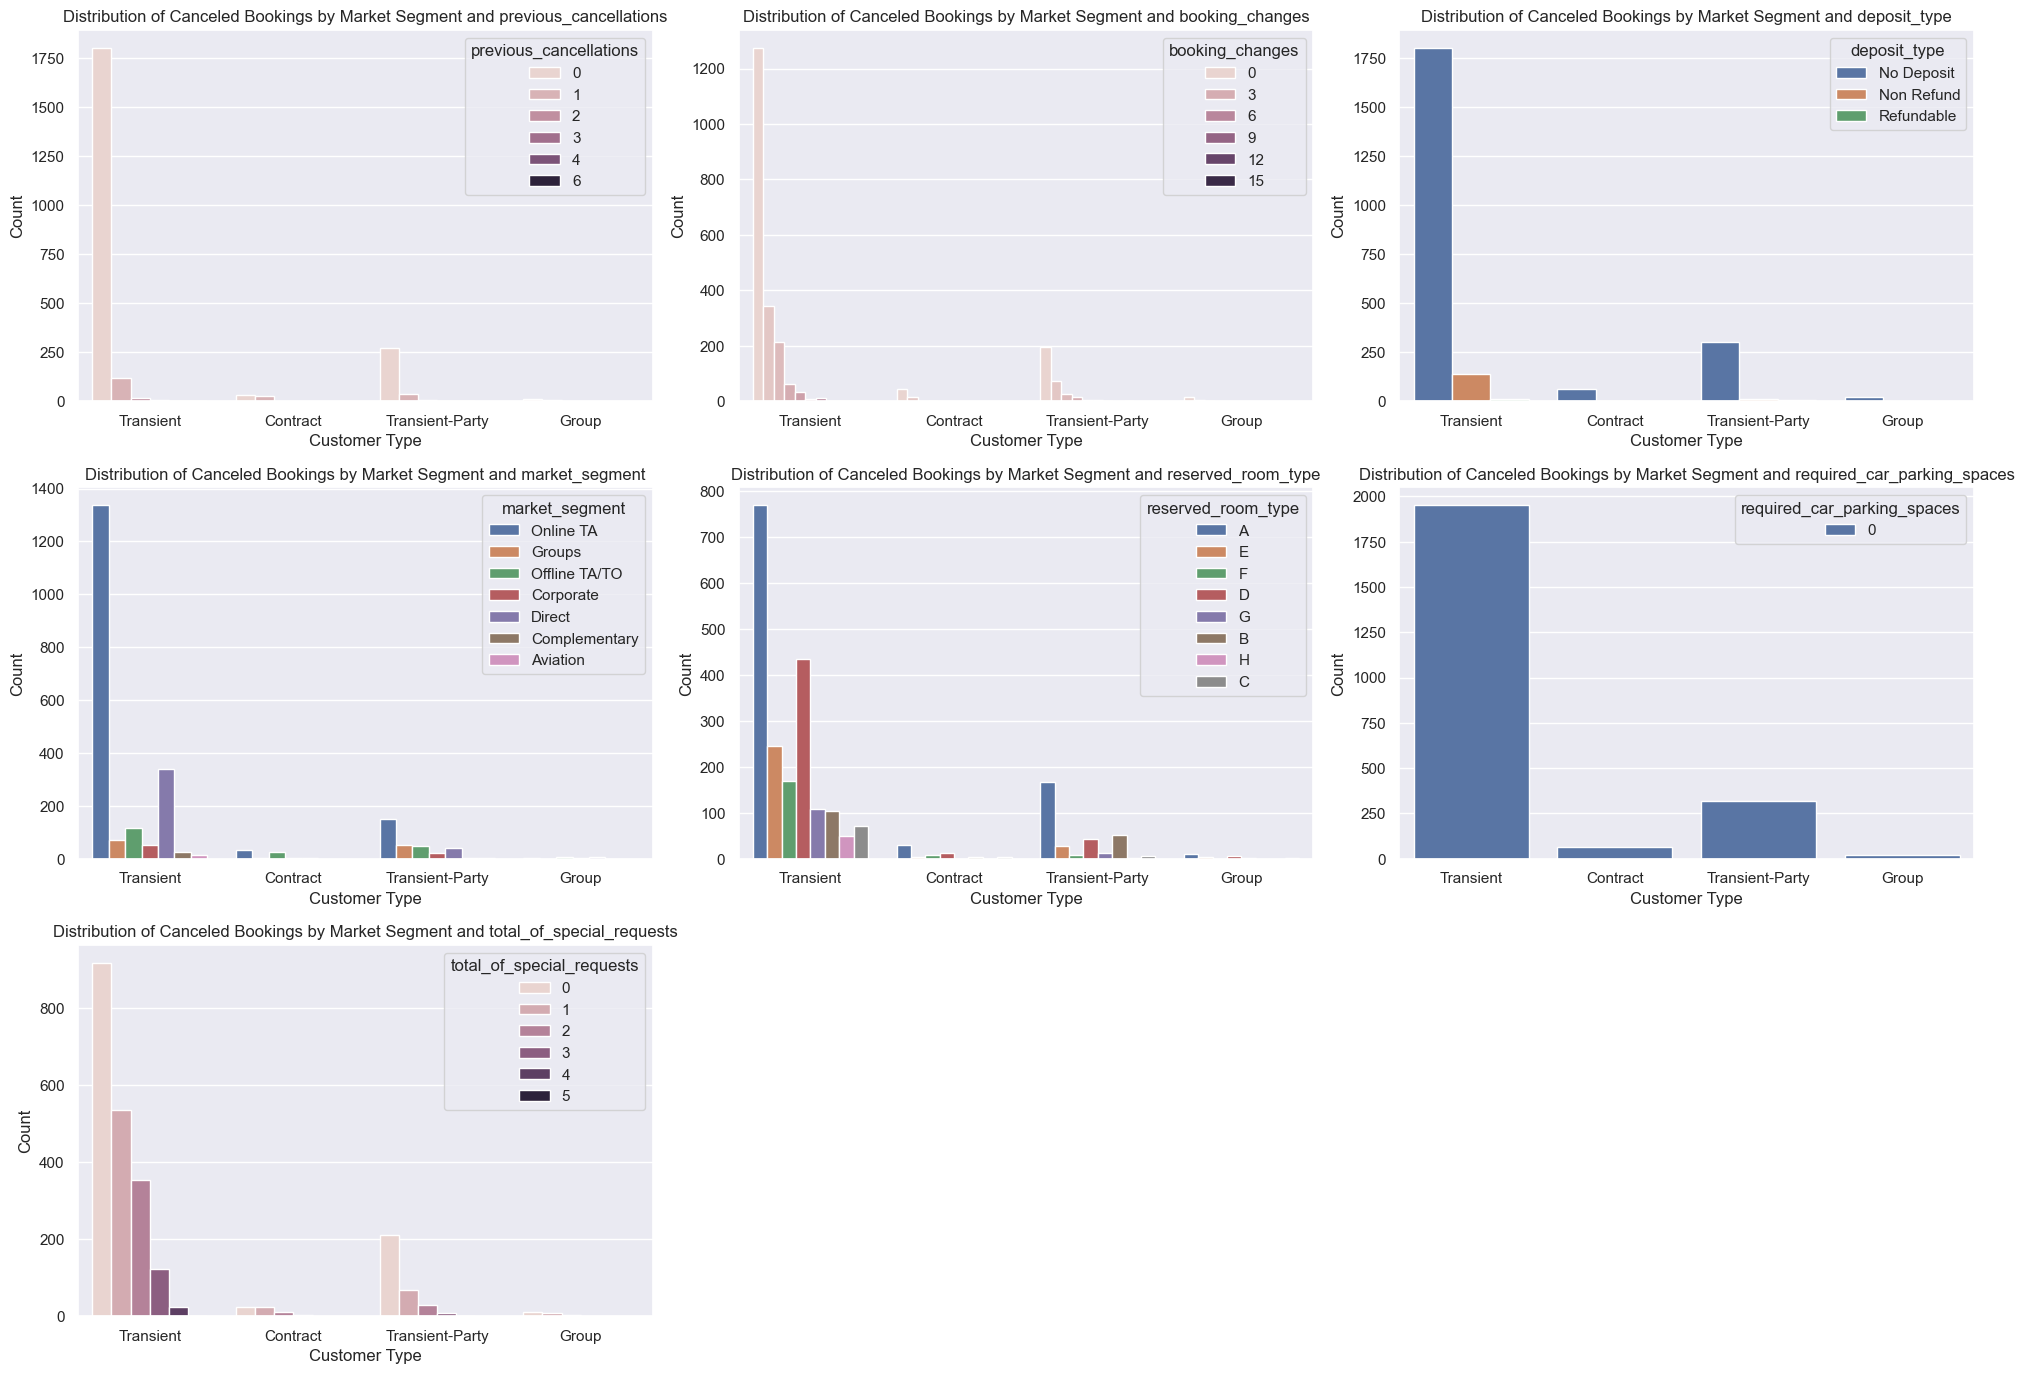

In [45]:
plt.figure(figsize=(20, 18))

canceled_bookings = df[df['is_canceled'] == 1]
columns_to_plot = ['previous_cancellations', 'booking_changes', 'deposit_type',
                   'market_segment', 'reserved_room_type', 'required_car_parking_spaces',
                   'total_of_special_requests']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x='customer_type', hue=column, data=canceled_bookings)
    plt.title(f'Distribution of Canceled Bookings by Market Segment and {column}')
    plt.xlabel('Customer Type')
    plt.ylabel('Count')
    plt.legend(title=column)

plt.tight_layout()
plt.show()

**Insight**

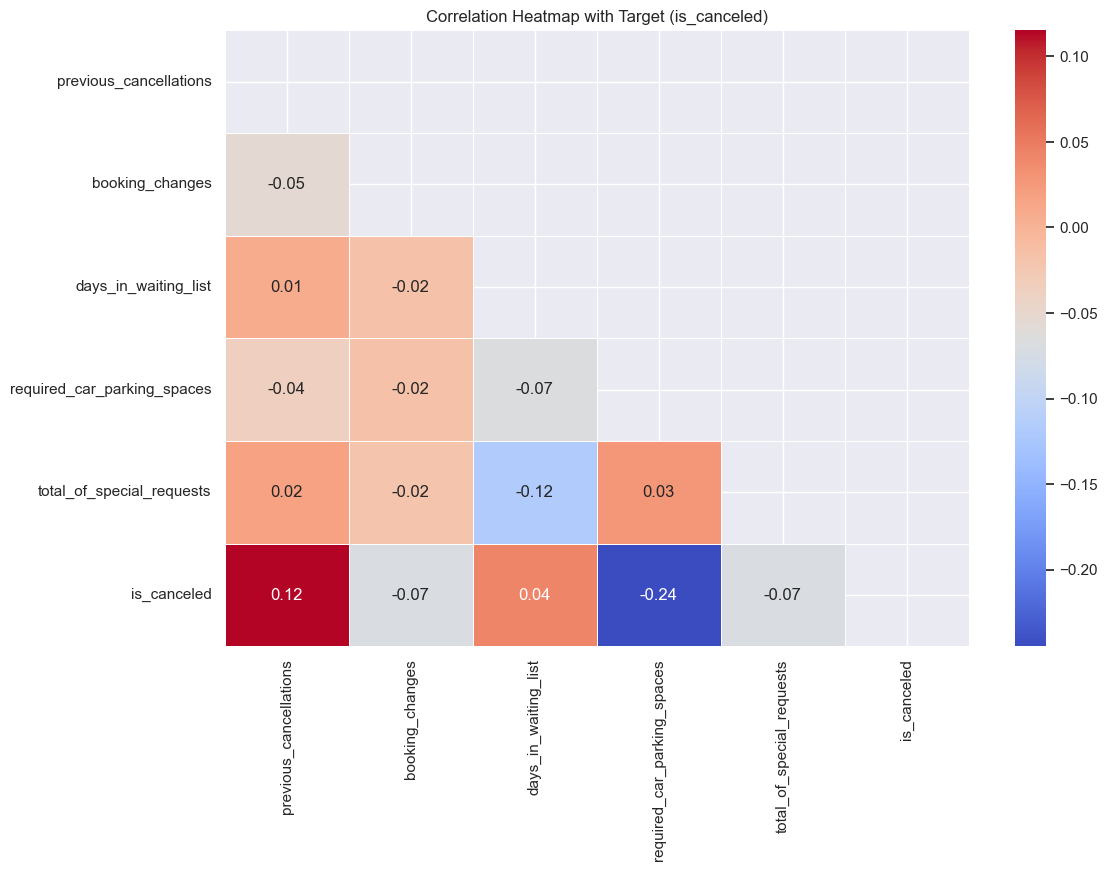

In [46]:
numerical_cat = df.select_dtypes(include=['int64']).columns
correlation_matrix = df[numerical_cat].corr()
correlation_with_target = correlation_matrix['is_canceled'].abs().sort_values(ascending=False)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap with Target (is_canceled)')
plt.show()


**Insight** 



# **Data Preparation**

In [48]:
# proportion
df['is_canceled'].value_counts() / len(df)*100

is_canceled
0    76.514622
1    23.485378
Name: count, dtype: float64

**Insight**

Meskipun mayoritas reservasi berhasil dilaksanakan, pembatalan masih merupakan bagian signifikan dari proses reservasi hotel. Hal ini dapat menjadi perhatian bagi industri perhotelan untuk mengembangkan strategi manajemen reservasi yang lebih efektif dan meningkatkan tingkat retensi pelanggan.

In [49]:
smote = SMOTE(random_state=0)
smoten = SMOTEN(random_state=0)
smotenc = SMOTENC(random_state=0, categorical_features=[0,2,3,4,5,6,7,8])
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

## **Define Features(X) and Target(y)**

In [50]:
df.head()

country market_segment  previous_cancellations  booking_changes  \
0     IRL  Offline TA/TO                       0                0   
1     FRA      Online TA                       0                0   
2     PRT      Online TA                       0                1   
3     NLD      Online TA                       0                0   
4     PRT      Online TA                       0                2   

  deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
0   No Deposit                     0  Transient-Party                  A   
1   No Deposit                     0        Transient                  A   
2   No Deposit                     0        Transient                  A   
3   No Deposit                     0        Transient                  A   
4   No Deposit                     0        Transient                  A   

   required_car_parking_spaces  total_of_special_requests  is_canceled  
0                            0                          0            0  
1                            0                          2            0  
2                            0                          2            0  
3                            0                          1            1  
4                            0                          2            0

In [51]:
#features 

#target
X = df.drop(columns=['is_canceled'])

#features
y =df['is_canceled']


In [52]:
X.head()

country market_segment  previous_cancellations  booking_changes  \
0     IRL  Offline TA/TO                       0                0   
1     FRA      Online TA                       0                0   
2     PRT      Online TA                       0                1   
3     NLD      Online TA                       0                0   
4     PRT      Online TA                       0                2   

  deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
0   No Deposit                     0  Transient-Party                  A   
1   No Deposit                     0        Transient                  A   
2   No Deposit                     0        Transient                  A   
3   No Deposit                     0        Transient                  A   
4   No Deposit                     0        Transient                  A   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          2  
2                            0                          2  
3                            0                          1  
4                            0                          2

In [53]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: is_canceled, dtype: int64

## **Data Splitting**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

- test_size=0.2: Parameter ini menentukan proporsi data yang akan dialokasikan untuk set pengujian (test set). Dalam hal ini, 20% dari data akan menjadi test set, sedangkan 80% akan digunakan untuk training set.
- random_state=25: Ini adalah seed untuk generator angka acak yang digunakan saat pembagian data. Jika Anda menggunakan nilai random_state yang sama, Anda akan mendapatkan pembagian yang sama setiap kali Anda menjalankan kode ini. Ini penting untuk memastikan hasil yang konsisten, terutama saat Anda ingin mereproduksi eksperimen.
- stratify=y: Parameter ini digunakan untuk memastikan bahwa distribusi kelas pada dataset awal dan setelah pembagian tetap sama. Jika stratify diatur ke y, itu berarti bahwa kelas-kelas target akan diwakili dengan seimbang di kedua set (train dan test).

In [58]:
df.describe(include='object')

country market_segment deposit_type customer_type reserved_room_type
count    10019          10019        10019         10019              10019
unique     132              7            3             4                  8
top        PRT      Online TA   No Deposit     Transient                  A
freq      1915           4905         9800          6841               4480

## **Preprocessing**

**Encoding**
- One-Hot Encoding adalah metode di mana setiap kategori pada variabel kategorikal diwakili sebagai vektor biner. Hanya satu elemen pada vektor yang memiliki nilai 1, menunjukkan kategori yang sesuai, sedangkan elemen lainnya bernilai 0.
- Binary Encoding adalah metode di mana setiap kategori diwakili sebagai bilangan biner (0 dan 1). Dihitung berdasarkan jumlah kategori unik.
- Ordinal Encoding adalah metode di mana setiap kategori diwakili sebagai bilangan bulat berdasarkan urutan atau peringkat mereka.

One-Hot Encoding sering digunakan untuk variabel kategorikal tanpa urutan, Binary Encoding mengurangi dimensi dan dapat berguna untuk kategori dengan jumlah yang besar, sedangkan Ordinal Encoding cocok untuk variabel kategorikal dengan urutan atau tingkatan. Berdasarkan pada keterangan diatas maka akan ada beberapa kolom yang perlu diubah, yaitu:

- Onehot : 'market_segment', 'reserved_room_type','deposit_type','customer_type'
- Binary : 'country'

In [250]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment', 'reserved_room_type','deposit_type','customer_type']),  
    ('binary', BinaryEncoder(), ['country'])                  
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['market_segment', 'reserved_room_type',
                                  'deposit_type', 'customer_type']),
                                ('binary', BinaryEncoder(), ['country'])])

In [60]:
y_train.value_counts()

is_canceled
0    6133
1    1882
Name: count, dtype: int64

`Proporsi kelas 1 (dibatalkan) adalah sekitar 0.235 atau sekitar 23.5%. `
<br>
Jika proporsi ini dianggap rendah tergantung pada konteks masalah atau model yang akan dibangun, mungkin diperlukan tindakan khusus seperti oversampling, undersampling, atau penggunaan teknik lainnya untuk menangani ketidakseimbangan kelas.

In [61]:
X_train.loc[0]

country                                    IRL
market_segment                   Offline TA/TO
previous_cancellations                       0
booking_changes                              0
deposit_type                        No Deposit
days_in_waiting_list                         0
customer_type                  Transient-Party
reserved_room_type                           A
required_car_parking_spaces                  0
total_of_special_requests                    0
Name: 0, dtype: object

In [62]:
df

country market_segment  previous_cancellations  booking_changes  \
0         IRL  Offline TA/TO                       0                0   
1         FRA      Online TA                       0                0   
2         PRT      Online TA                       0                1   
3         NLD      Online TA                       0                0   
4         PRT      Online TA                       0                2   
...       ...            ...                     ...              ...   
83515     GBR         Direct                       0                2   
83543     CHN      Online TA                       0                0   
83554     BEL         Groups                       0                0   
83562     NLD      Online TA                       0                0   
83565     ITA  Offline TA/TO                       0                0   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
0       No Deposit                     0  Transient-Party                  A   
1       No Deposit                     0        Transient                  A   
2       No Deposit                     0        Transient                  A   
3       No Deposit                     0        Transient                  A   
4       No Deposit                     0        Transient                  A   
...            ...                   ...              ...                ...   
83515   No Deposit                     0  Transient-Party                  A   
83543   No Deposit                     0  Transient-Party                  C   
83554   No Deposit                     0  Transient-Party                  A   
83562   No Deposit                     0        Transient                  B   
83565   No Deposit                     0        Transient                  A   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
0                                0                          0            0  
1                                0                          2            0  
2                                0                          2            0  
3                                0                          1            1  
4                                0                          2            0  
...                            ...                        ...          ...  
83515                            1                          1            0  
83543                            0                          2            0  
83554                            0                          1            0  
83562                            0                          0            0  
83565                            0                          2            0  

[10019 rows x 11 columns]

Selanjutnya akan dilihat bagaimana korelasi setiap variabel yang sudah dilakukan one hot coding serta binarisasi dengan variabel is_canceled

Terlihat bahwa pada variabel required_car_parking_spaces dan deposit_type_Non Refund memiliki korelasi yang lebih dari 0.2 terhadap variabel teteap is_canceled

# **MODELING & EVALUATION**

## **Benchmark Model**

In [63]:
# scaling features 
robust = RobustScaler()

# for tuning
minmax = MinMaxScaler()

In [77]:
logreg = LogisticRegression(solver='liblinear', max_iter = 200, random_state =0)
Knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=35)
rf = RandomForestClassifier(min_samples_leaf=6, min_samples_split=6, n_estimators = 120)
xgboost = XGBClassifier(random_state=0, verbosity=0)
adaboost = AdaBoostClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
catboost = CatBoostClassifier(verbose=False,random_state=0)



### **Pemilihan Scaler**

In [197]:
models = [logreg, Knn, dtree, rf, xgboost, adaboost,gradboost,catboost]

list_mean_minmax = []
list_std_minmax = []
list_mean_robust = []
list_std_robust = []

# Minmax Scaler
for algoritma in models:
    if is_classifier(algoritma):
        pipe_model_minmax = Pipeline([
            ('preprocess', transformer),
            ('resampler', smote),
            ('scaler', minmax),
            ('model', algoritma)
        ])
    else:
        pipe_model_minmax = Pipeline([
            ('preprocess', transformer),
            ('resampler', smote),
            ('model', algoritma)
        ])
    
    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model_minmax,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring='recall'
    )

    list_mean_minmax.append(model_cv.mean())
    list_std_minmax.append(model_cv.std())

# Robust Scaler
for algoritma in models:
    if is_classifier(algoritma):
        pipe_model_robust = Pipeline([
            ('preprocess', transformer),
            ('resampler', smote),
            ('scaler', robust),
            ('model', algoritma)
        ])
    else:
        pipe_model_robust = Pipeline([
            ('preprocess', transformer),
            ('resampler', smote),
            ('model', algoritma)
        ])
    
    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model_robust,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring='recall'
    )

    list_mean_robust.append(model_cv.mean())
    list_std_robust.append(model_cv.std())

pd.DataFrame({
    'model': models,
    'mean minmax': list_mean_minmax,
    'std minmax': list_std_minmax,
    'mean robust scaler': list_mean_robust,
    'std robust scaler': list_std_robust
}).sort_values(by=['mean minmax', 'mean robust scaler'], ascending=False)


model  mean minmax  std minmax  \
2  DecisionTreeClassifier(criterion='entropy', ma...     0.772010    0.050680   
0  LogisticRegression(max_iter=200, random_state=...     0.771529    0.020616   
3  (DecisionTreeClassifier(max_features='sqrt', m...     0.688608    0.017692   
5  (DecisionTreeClassifier(max_depth=1, random_st...     0.684384    0.020105   
6  ([DecisionTreeRegressor(criterion='friedman_ms...     0.636019    0.014396   
1                             KNeighborsClassifier()     0.542528    0.017201   
7  <catboost.core.CatBoostClassifier object at 0x...     0.399563    0.014830   
4  XGBClassifier(base_score=None, booster=None, c...     0.394266    0.009329   

   mean robust scaler  std robust scaler  
2            0.772010           0.050680  
0            0.775777           0.021561  
3            0.685957           0.013406  
5            0.684384           0.020105  
6            0.636019           0.014396  
1            0.645606           0.013047  
7            0.399563           0.014830  
4            0.394266           0.009329

In [203]:
print(f"rata-rata dari mean minmax {np.array(list_mean_minmax).mean()}")
print(f"rata-rata dari mean robust {np.array(list_mean_robust).mean()}")
print("-"*100)
print(f"rata-rata dari std minmax {np.array(list_std_minmax).mean()}")
print(f"rata-rata dari std robust {np.array(list_std_robust).mean()}")

rata-rata dari mean minmax 0.6111134234437609
rata-rata dari mean robust 0.6241978949150628
----------------------------------------------------------------------------------------------------
rata-rata dari std minmax 0.02060597582606216
rata-rata dari std robust 0.01966916956454144


Terlihat bahwa pada robust scalar memiliki rata - rata recall yang cenderung lebih besar dibandingkan dengan minmax scaler. Selain itu standar deviasi recall dari robust scaler juga  cenderung lebih kecil dibandingkan dengan minmax scalar. Standar deviasi yang lebih kecil artinya nilai recall tersebut cenderung mendekati nilai rata-rata dari recall dan distribusi data tersebut lebih terkonsentrasi di suatu titik. Selain itu, standar deviasi yang kecil juga dapat dikatakan nilai-nilai recall tersebut stabil atau tidak bervariasi. Hal ini yang menjadi dasar pemilihan standar deviasi yang kecil. 

Selanjutnya akan dilihat bagaimana nilai recall dari setiap model yang dipilih

### **Predict Benchmark Model to Test Set and Train Set**

In [204]:
models = [logreg, Knn, dtree, rf, xgboost, adaboost,gradboost,catboost]


list_recall_train = []
list_recall_test = []


for algoritma in models:
    if algoritma in [logreg, Knn, dtree, rf, xgboost, adaboost, gradboost, catboost]:
        pipe_model = Pipeline([
            ('preprocess', transformer),
            ('resample',smote),
            ('scaler', robust),
            ('model', algoritma)
        ])
    else:
        pipe_model = Pipeline([
            ('preprocess', transformer),            
            ('resample',robust),
            ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    list_recall_train.append(recall_train)
    list_recall_test.append(recall_test)

# Perbandingan performa antar model
benchmark =pd.DataFrame({
            'model': ['logreg', 'Knn', 'dtree', 'rf', 'xgboost', 'adaboost', 'gradboost', 'catboost'],
            'recall validation' : list_mean_robust, 
            'recall (train set)': list_recall_train,
            'recall (test set)': list_recall_test
            }).set_index('model').sort_values(by='recall (test set)', ascending=False)
benchmark

recall validation  recall (train set)  recall (test set)
model                                                              
dtree               0.772010            0.808183           0.791932
logreg              0.775777            0.791180           0.783439
rf                  0.685957            0.798087           0.683652
adaboost            0.684384            0.687566           0.670913
gradboost           0.636019            0.698725           0.664544
Knn                 0.645606            0.937301           0.583864
xgboost             0.394266            0.531881           0.394904
catboost            0.399563            0.484591           0.373673

Terlihat bahwa pada model decision tree memiliki hasil recall yang paling baik. Model decision tree yang memiliki recall dari train set 81% dan recall pada test set 79% yang mana model decision tree juga dapat dikatakan cenderung stabil. Selain itu, model logisticRegression memiliki recall train dan test yang cukup baik, namun kestabilan dari model logisticRegression lebih baik dibandingkan dengan model decision tree. Hal ini dapat dilihat pada perbedaan hasil recall train set dan test set kurang lebih hanya 1%.

Adapun ada model yang mengalami overfitting seperti KNN yang mana memiliki recall train set hingga 94% namun hasil recal test set hanya 58%. Perbedaan ini cukup jauh yang menyebabkan model ini dikatakan overfitting.

Model DecisionTree dan LogisticRegression akan dipilih untuk dilakukan hyperparameter tuning. Hyperparameter tuning dilakukan dengan harapan dapat meningkatkan recall pada kedua model tersebut dan kestabiland dari kedua model tersebut.

## **Hyperparameter Tunning**

### **Hyperparameter Tuning : Decision Tree**

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#RandomizedSearchCV = mencoba beberapa kombinasi tapi dibatasi jumlah randomnya

In [160]:
skfold = StratifiedKFold(n_splits=5)
hyperparam_space = {
    'modeling__max_depth': range(2, 30, 3),
    'modeling__min_samples_split': range(2,200),
    'modeling__min_samples_leaf': range(1,100)
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('resample',smote),
    ('scaling', robust),
    ('modeling',dtree)
])

# Create GridSearchCV object
random_search_tree = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    error_score='raise',
    scoring='recall',
    n_jobs=-1,
    n_iter= 200)



In [161]:
# Fit the grid search to find the best hyperparameters
random_search_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['market_segment',
                                                                                'reserved_room_type',
                                                                                'deposit_type',
                                                                                'customer_type']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country'])])),
                                             ('resample',
                                              SMOTE(random_state=0)),
                                             ('scaling', RobustScaler()),
                                             ('modeling',
                                              DecisionTreeClassifier(criterion='entropy',
                                                                     max_depth=5,
                                                                     random_state=35))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 30, 3),
                                        'modeling__min_samples_leaf': range(1, 100),
                                        'modeling__min_samples_split': range(2, 200)},
                   scoring='recall')

In [172]:
random_search_tree.best_score_

0.8378985834415035

In [173]:
random_search_tree.best_params_

{'modeling__min_samples_split': 35,
 'modeling__min_samples_leaf': 15,
 'modeling__max_depth': 8}

Hyperparameter terbaik Decision Tree dari hasil RandomSearch => `max_depth` = 8, `min_samples_split` = 35, `min_samples_leaf` = 15 dengan recall 0.837899. Nilai ini ada peningkatan dibandingkan sebelum dilakukan hyperparamter tuning

In [174]:
pd.DataFrame(random_search_tree.cv_results_).sort_values('rank_test_score').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
184       0.201645      0.020746         0.022205        0.003654   
95        0.204245      0.033888         0.020606        0.002247   
105       0.179040      0.018744         0.020605        0.003383   
122       0.194844      0.035389         0.020005        0.001790   
173       0.198844      0.010167         0.020804        0.002785   

    param_modeling__min_samples_split param_modeling__min_samples_leaf  \
184                                35                               15   
95                                 75                               20   
105                                84                               10   
122                                72                                6   
173                                 6                                3   

    param_modeling__max_depth  \
184                         8   
95                          8   
105                         8   
122                         8   
173                         8   

                                                params  split0_test_score  \
184  {'modeling__min_samples_split': 35, 'modeling_...           0.827128   
95   {'modeling__min_samples_split': 75, 'modeling_...           0.832447   
105  {'modeling__min_samples_split': 84, 'modeling_...           0.811170   
122  {'modeling__min_samples_split': 72, 'modeling_...           0.811170   
173  {'modeling__min_samples_split': 6, 'modeling__...           0.805851   

     split1_test_score  split2_test_score  split3_test_score  \
184           0.792553           0.819149           0.877984   
95            0.792553           0.795213           0.880637   
105           0.792553           0.819149           0.877984   
122           0.792553           0.819149           0.877984   
173           0.792553           0.816489           0.880637   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
184           0.872679         0.837899        0.032681                1  
95            0.877984         0.835767        0.038259                2  
105           0.875332         0.835238        0.034914                3  
122           0.872679         0.834707        0.034315                4  
173           0.872679         0.833642        0.036020                5

In [175]:
print(pd.DataFrame(random_search_tree.cv_results_).sort_values('rank_test_score').loc[184,"params"])
print(pd.DataFrame(random_search_tree.cv_results_).sort_values('rank_test_score').loc[95,"params"])
print(pd.DataFrame(random_search_tree.cv_results_).sort_values('rank_test_score').loc[105,"params"])
print(pd.DataFrame(random_search_tree.cv_results_).sort_values('rank_test_score').loc[122,"params"])
print(pd.DataFrame(random_search_tree.cv_results_).sort_values('rank_test_score').loc[173,"params"])

{'modeling__min_samples_split': 35, 'modeling__min_samples_leaf': 15, 'modeling__max_depth': 8}
{'modeling__min_samples_split': 75, 'modeling__min_samples_leaf': 20, 'modeling__max_depth': 8}
{'modeling__min_samples_split': 84, 'modeling__min_samples_leaf': 10, 'modeling__max_depth': 8}
{'modeling__min_samples_split': 72, 'modeling__min_samples_leaf': 6, 'modeling__max_depth': 8}
{'modeling__min_samples_split': 6, 'modeling__min_samples_leaf': 3, 'modeling__max_depth': 8}


Dari tabel di atas juga terlihat bahwa 5 rata-rata recall tertinggi semuanya memiliki hyperparameter `max_depth` adalah 8, sedangkan nilai hyperparameter dari `min_samples_split` masih sangat bervariasi diantara 3 - 20. Hyperparameter `min_samples_leaf` juga masih bervariasi seperti pada `min_samples_split`. Hal ini dapat menunjukkan bahwa pada model DecisionTree memiliki score recall yang tinggi pada saat memiliki kedalaman pohon 8.

Selanjutnya akan dilihat pada hasil recall pada data test.

In [176]:
# menggunakan model terbaik hasil randomizedsearch
tree_bench = Pipeline([
    ('preprocessing', transformer),
    ('resample',smote),
    ('scaling', robust),
    ('modeling',dtree)
])

# fitting
tree_bench.fit(X_train, y_train)

# predict
y_pred_before_tun = tree_bench.predict(X_test)

# evaluate (recall_score)

print(f"Score recall sebelum tuning {recall_score(y_test, y_pred_before_tun)}")

Score recall sebelum tuning 0.7919320594479831


In [177]:
tree_after_tuning = random_search_tree.best_estimator_
tree_after_tuning.fit(X_train, y_train)
y_pred_best_tree = tree_after_tuning.predict(X_test)
print(f"Score recall setelah tuning {recall_score(y_test, y_pred_best_tree)}")

Score recall setelah tuning 0.8492569002123143


Terlihat bahwa pada DecisionTree yang telah dilakukan hyperparameter tuning memiliki hasil yang lebih baik dari benchmark score. Selain itu model DecisionTree setelah hyperparameter tuning tidak terjadi overfitting karena nilai recall train set lebih kecil dibandingkan dengan nilai recall pada test set, yaitu 0.837899 < 0.849257. Hal ini ada peningkatan pada model DecisionTree setelah dilakukan overfitting

### **Hyperparameter Tuning : Logistic Regression**

Solver pada LogisticRegression dilakukan percobaan pada solver liblinear dan saga, sehingga hyperparameter tuning yang bisa dilakukan adalah sebagai berikut:
- intercept_scaling
- C
- class_weight
- random_state

In [134]:
hyperparam_space_logreg = {
    'modeling__intercept_scaling': [5,4,3,2,1,0.1,0.01,0.001,0.0001,0.00001],
    'modeling__C': [2,1,0.01,0.002,0.001,0.005],
    'modeling__class_weight': ['balanced',None],
    'modeling__random_state': range(0,50,5),
    'modeling__solver':['liblinear','saga']
}
skfold = StratifiedKFold(n_splits=5)

pipe_model_logreg = Pipeline([
    ('preprocessing', transformer),
    ('resample',smote),
    ('scaling', robust),
    ('modeling',logreg)
])

# Create GridSearchCV object
random_search_logreg = RandomizedSearchCV(
    estimator=pipe_model_logreg,
    param_distributions=hyperparam_space_logreg,
    cv=skfold,
    error_score='raise',
    scoring="recall",
    n_iter= 1000)

In [135]:
# Fit the grid search to find the best hyperparameters
random_search_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['market_segment',
                                                                                'reserved_room_type',
                                                                                'deposit_type',
                                                                                'customer_type']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country'])])),
                                             ('resampl...
                                              LogisticRegression(max_iter=200,
                                                                 random_state=0,
                                                                 solver='liblinear'))]),
                   n_iter=1000,
                   param_distributions={'modeling__C': [2, 1, 0.01, 0.002,
                                                        0.001, 0.005],
                                        'modeling__class_weight': ['balanced',
                                                                   None],
                                        'modeling__intercept_scaling': [5, 4, 3,
                                                                        2, 1,
                                                                        0.1,
                                                                        0.01,
                                                                        0.001,
                                                                        0.0001,
                                                                        1e-05],
                                        'modeling__random_state': range(0, 50, 5),
                                        'modeling__solver': ['liblinear',
                                                             'saga']},
                   scoring='recall')

In [137]:
random_search_logreg.best_score_

0.7757774140752864

In [138]:
random_search_logreg.best_params_

{'modeling__solver': 'liblinear',
 'modeling__random_state': 0,
 'modeling__intercept_scaling': 1,
 'modeling__class_weight': 'balanced',
 'modeling__C': 1}

Hyperparameter terbaik LogisticRegression dari hasil RandomSearch => `intercept_scaling` = liblinear, `random_state` = 0, `intercept_scaling` = 1, `class_weight` = 'balanced', `C` = 1 dengan recall 0.77577. Nilai ini turun dibandingkan dengan nilai sebelum tuning.

In [139]:
pd.DataFrame(random_search_logreg.cv_results_).sort_values('rank_test_score').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
502       0.075817      0.003869         0.009602        0.000800   
316       0.074414      0.004226         0.008803        0.001327   
523       0.075218      0.005912         0.009202        0.000400   
311       0.074610      0.003443         0.008403        0.000489   
808       0.074414      0.004761         0.008805        0.001172   

    param_modeling__solver param_modeling__random_state  \
502              liblinear                           15   
316              liblinear                           10   
523              liblinear                           45   
311              liblinear                           15   
808              liblinear                           20   

    param_modeling__intercept_scaling param_modeling__class_weight  \
502                                 1                         None   
316                                 1                         None   
523                                 1                         None   
311                                 1                     balanced   
808                                 1                     balanced   

    param_modeling__C                                             params  \
502                 1  {'modeling__solver': 'liblinear', 'modeling__r...   
316                 1  {'modeling__solver': 'liblinear', 'modeling__r...   
523                 1  {'modeling__solver': 'liblinear', 'modeling__r...   
311                 1  {'modeling__solver': 'liblinear', 'modeling__r...   
808                 1  {'modeling__solver': 'liblinear', 'modeling__r...   

     split0_test_score  split1_test_score  split2_test_score  \
502           0.771277            0.81383           0.755319   
316           0.771277            0.81383           0.755319   
523           0.771277            0.81383           0.755319   
311           0.771277            0.81383           0.755319   
808           0.771277            0.81383           0.755319   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
502           0.782493           0.755968         0.775777        0.021561   
316           0.782493           0.755968         0.775777        0.021561   
523           0.782493           0.755968         0.775777        0.021561   
311           0.782493           0.755968         0.775777        0.021561   
808           0.782493           0.755968         0.775777        0.021561   

     rank_test_score  
502                1  
316                1  
523                1  
311                1  
808                1

In [140]:
print(pd.DataFrame(random_search_logreg.cv_results_).sort_values('rank_test_score').loc[502,"params"])
print(pd.DataFrame(random_search_logreg.cv_results_).sort_values('rank_test_score').loc[316,"params"])
print(pd.DataFrame(random_search_logreg.cv_results_).sort_values('rank_test_score').loc[523,"params"])
print(pd.DataFrame(random_search_logreg.cv_results_).sort_values('rank_test_score').loc[311,"params"])
print(pd.DataFrame(random_search_logreg.cv_results_).sort_values('rank_test_score').loc[808,"params"])

{'modeling__solver': 'liblinear', 'modeling__random_state': 15, 'modeling__intercept_scaling': 1, 'modeling__class_weight': None, 'modeling__C': 1}
{'modeling__solver': 'liblinear', 'modeling__random_state': 10, 'modeling__intercept_scaling': 1, 'modeling__class_weight': None, 'modeling__C': 1}
{'modeling__solver': 'liblinear', 'modeling__random_state': 45, 'modeling__intercept_scaling': 1, 'modeling__class_weight': None, 'modeling__C': 1}
{'modeling__solver': 'liblinear', 'modeling__random_state': 15, 'modeling__intercept_scaling': 1, 'modeling__class_weight': 'balanced', 'modeling__C': 1}
{'modeling__solver': 'liblinear', 'modeling__random_state': 20, 'modeling__intercept_scaling': 1, 'modeling__class_weight': 'balanced', 'modeling__C': 1}


Dari tabel di atas juga terlihat bahwa 5 rata-rata nilai recall tertinggi didominasi oleh hyperparameter `C` adalah 1, `intercept_scaling` adalah 1, dan `solver` adalah 'liblinear'. Hyperparameter `random_state` masih cukup bervariasi antara 10 - 45. Hal tersebut menunjukkan bahwa nilai recall untuk perubahan pada hyperparameter `random_state` tidak begitu berpengaruh.

Selanjutnya akan dilihat pada data test.

In [193]:
# menggunakan model terbaik hasil randomizedsearch
logreg_bench = Pipeline([
    ('preprocessing', transformer),
    ('resample',smote),
    ('scaling', robust),
    ('modeling',logreg)
])

# fitting
logreg_bench.fit(X_train, y_train)

# predict
y_pred_logreg_bench_before_tun = logreg_bench.predict(X_test)

# evaluate (recall_score)

print(f"Score recall sebelum tuning {recall_score(y_test, y_pred_logreg_bench_before_tun)}")

Score recall sebelum tuning 0.7834394904458599


In [136]:
logreg_after_tuning = random_search_logreg.best_estimator_
logreg_after_tuning.fit(X_train, y_train)
y_pred_best_logreg = logreg_after_tuning.predict(X_test)
print(f"Score recall setelah tuning {recall_score(y_test, y_pred_best_logreg)}")

Score recall setelah tuning 0.7834394904458599


Terlihat bahwa model Logistic Regression setelah kita tuning hyperparameternya memiliki nilai recall yang sama dengan model benchmark dari logistic Regression pada test set.

### **Komparasi model Decision Tree dengan Logistic Regression**

In [205]:
# membuat tabulasi f2 score
df_score = pd.DataFrame({
    'Decision Tree' : [list_mean_robust[2], random_search_tree.best_score_, recall_score(y_test, y_pred_before_tun), recall_score(y_test, y_pred_best_tree)],
    'Logistic Regression' : [list_mean_robust[0], random_search_logreg.best_score_, recall_score(y_test, y_pred_logreg_bench_before_tun), recall_score(y_test, y_pred_best_logreg)]
})

# untuk label index
outside = ['Train Set', 'Train Set', 'Test Set', 'Test Set',]
inside = ['Benchmark Model', 'Tuning Model', 'Benchmark Model', 'Tuning Model']

# memasangkan item pada index yang sama dari 2 list
hier_index = list(zip(outside, inside))

# membuat multiindex 
multi = pd.MultiIndex.from_tuples(hier_index)

# mengubah lavel index lama menjadi multi-index yang telah kita buat di atas
df_score.index = multi
df_score


Decision Tree  Logistic Regression
Train Set Benchmark Model       0.772010             0.775777
          Tuning Model          0.837899             0.775777
Test Set  Benchmark Model       0.791932             0.783439
          Tuning Model          0.849257             0.783439

Terlihat bahwa :
- Recall pada Train Set untuk Model Decision Tree yang sudah di-tuning (0.837899) lebih tinggi dari Benchmark Model (0.775732)
- Recall pada Test Set untuk Model Decision Tree yang sudah di-tuning (0.849257) lebih tinggi dari Benchmark Model (0.791932)
- Recall pada Train Set untuk model Logistic Regression yang sudah di tuning (0.775777) sama dengan dibandingkan dengan Benchmark model (0.775777)
- Recall pada Test Set untuk model Logistic Regression yang sudah di tuning (0.783439) sama dengan Benchmark model (0.783439)

Akan digunakan model Decision Tree setelah di tuning sebagai Interpretable Machine Learning dan model Logistic Regression sebagai Explainable Machine Learning.

### **Final Model Decision Tree - Interpretable Machine Learning**

Model terbaik sebagai Interpretable Machine Learning adalah model Decision Tree yang sudah di tuning. Hal ini dapat dilihat dari hasil recall testing yang sudah menyentuh angka 84%.

Model Decision Tree adalah model yang dapat digunakan untuk memecahkan permasalahn klasifikasi dan regresi. Pada Decision Tree, model ini bekerja seperti struktur pada pohon. Cafra pengambilan keputusan dari model ini adalah dengan memberikan beberapa pilihan dari setiap simpulnya, yang mana model ini biasa dimulai dengan satu simpul. Simpul tersebut akan bercabang dan setiap cabangnya berisi juga pilihan-pilihan dari tindakan lainnya. Hal ini terus berulang sampai membuat cabang baru dengan kedalaman tertentu hingga kriteria yang diinginkan terpenuhi.

In [235]:
# menyimpan algoritma model Decision Tree terbaik sebagai best tree
best_tree = Pipeline([
    ('prep', transformer),
    ('resample', smote),
    ('algoritma', DecisionTreeClassifier(criterion='entropy', min_samples_split=35, min_samples_leaf=15, max_depth=8, random_state=35 ))
])

best_tree.fit(X_train, y_train)
y_pred_best_tree = best_tree.predict(X_test)
recall_score(y_test, y_pred_best_tree) 

0.8492569002123143

Pada model best_tree di atas terlihat bahwa meski tidak dilakukan scaling, nilai recall pada test set masih sama di angka 0.849257. Hal ini menunjukkan bahwa scaling tidak berpengaruh terhadap model Decision Treet. Metode scaling tidak kita terapkan pada model Decision Tree akhir karena dapat mempersulit untuk menginterpretasikan hasil yang diperoleh.

##### *`FEATURE IMPORTANCES`*

In [222]:
# mendapatkan nama fitur dari transformer
names = transformer.get_feature_names_out()
names

array(['onehot__market_segment_Aviation',
       'onehot__market_segment_Complementary',
       'onehot__market_segment_Corporate',
       'onehot__market_segment_Direct', 'onehot__market_segment_Groups',
       'onehot__market_segment_Offline TA/TO',
       'onehot__market_segment_Online TA', 'onehot__reserved_room_type_A',
       'onehot__reserved_room_type_B', 'onehot__reserved_room_type_C',
       'onehot__reserved_room_type_D', 'onehot__reserved_room_type_E',
       'onehot__reserved_room_type_F', 'onehot__reserved_room_type_G',
       'onehot__reserved_room_type_H', 'onehot__deposit_type_No Deposit',
       'onehot__deposit_type_Non Refund',
       'onehot__deposit_type_Refundable',
       'onehot__customer_type_Contract', 'onehot__customer_type_Group',
       'onehot__customer_type_Transient',
       'onehot__customer_type_Transient-Party', 'binary__country_0',
       'binary__country_1', 'binary__country_2', 'binary__country_3',
       'binary__country_4', 'binary__country_5', 

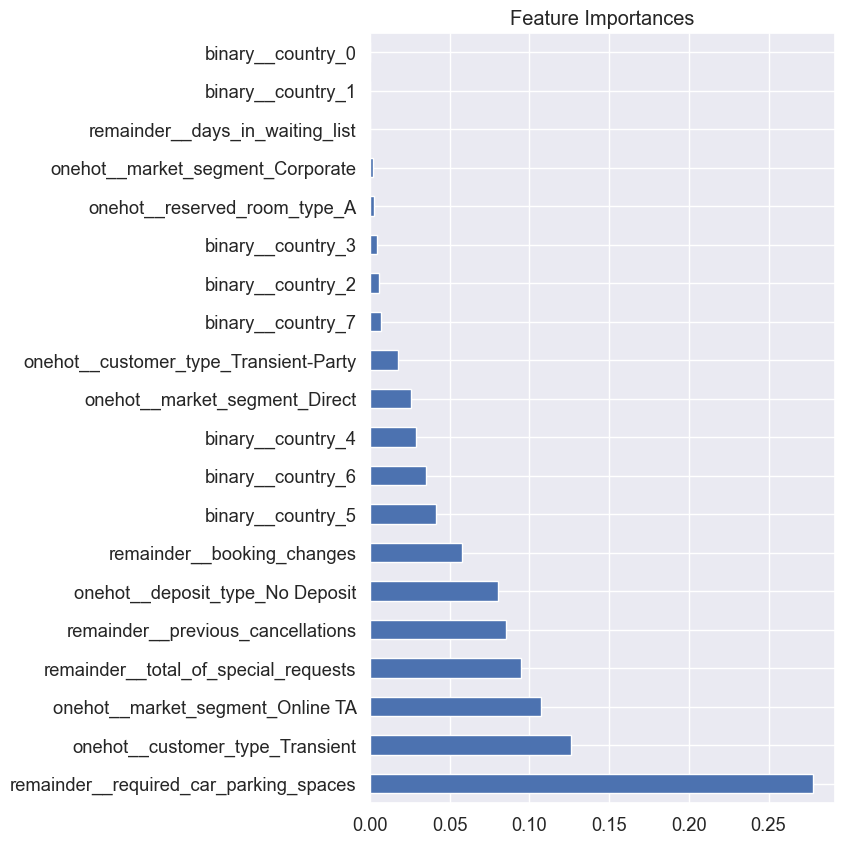

In [309]:
coef1 = pd.Series(best_tree['algoritma'].feature_importances_, names).sort_values(ascending = False).head(20)
coef1.plot(kind='barh', title='Feature Importances',figsize=(6,10))
plt.show()

Terlihat bahwa fitur yang paling berpengaruh adalah required_car_parking_spaces terhadap berhasil atau gagalnya transaksi. Selain itu, selanjutnya ada customer_type_Transient, market_segment_onlineTA, dan seterusnya sampai market_segment_Corporate masih memberikan pengaruh terhadap Decision Tree untuk memnentukan berhasil atau gagalnya transaksi. Namun, pada fitur days_in_waiting_list, country_1, country_0, dan sisa yang lainnya tidak memberikan pengaruh apa apa terhadap berhasil atau gagalnya transaksi.

##### *`Plot Tree`*

In [236]:
plt.figure(figsize=(15,6),dpi=1000)

plot_tree(
    best_tree['algoritma'],
    feature_names = names,
    filled = True,
    class_names = ["0", "1"]
        );

Perhatikan bahwa variabel required_car_parking_spaces sesuai dengan jumlah yang dibutuhkan

Contoh Interpretasi:
1. Apabila required_car_parking_spaces 0 dan costumer_type bukan transient dan previous_cancellation 0 dan termasuk ke dalam country_6 dan market_segment adalah OnlineTA maka akan dikategorikan 0 (transaksi completed)
2. Apabila required_car_parking_spaces 0 dan costumer_type bukan transient dan previous_cancellation 0 dan termasuk ke dalam country_6 dan market_segment adalah OnlineTA dan customer_type adalah Transient-party maka akan dikategorikan 1 (transaksi failed)
3. Apabila required_car_parking_spaces 0 dan costumer_type bukan transient dan previous_cancellation 0 dan termasuk ke dalam country_6 dan bukan termasuk country_7 maka akan dikategorikan 0 (transaksi completed)
4. Apabila required_car_parking_spaces 0 dan costumer_type bukan transient dan previous_cancellation 0 dan termasuk ke dalam country_6 dan bukan termasuk country_7 dan booking_changes adalah 0 atau 1 maka akan dikategorikan 1 (transaksi failed)
5. Apabila required_car_parking_spaces lebih dari 0 maka akan dikategorikan 0 (transaksi completed)

Dari contoh interpretasi required_car_parking_spaces sangat berpengaruh pada transaksi itu berhasil atau tidak, karena apabila membutuhkan parking spaces yang mana lebih dari 0, maka transaksi tersebut langsung berhasil, namun apabila tidak membutuhkan parking spaces maka harus menguki aturan Decision Tree yang maksimal kedalamannya adalah 8.

Sehingga fitur dari required_car_parking_spaces sangat penting karena sangat menentukan keberhasilan dari transaksi.

##### *`Confusion Matrix`*

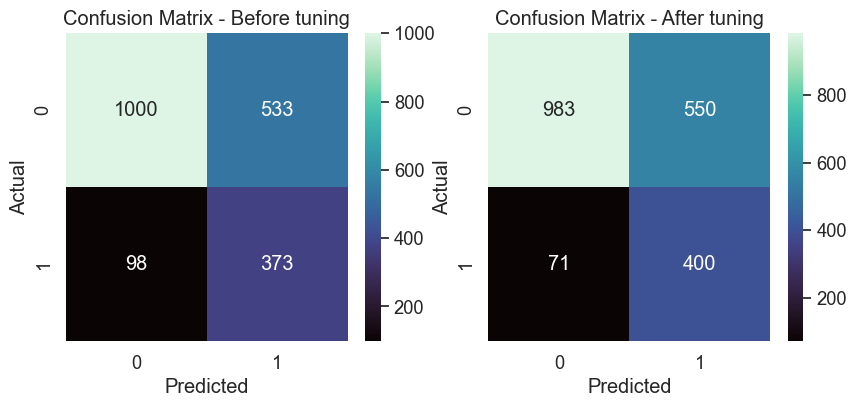

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred_before_tun), annot=True, fmt=".0f", cmap=cmap, ax=axes[0])
axes[0].set_title('Confusion Matrix - Before tuning')
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred_best_tree), annot=True, fmt=".0f", cmap=cmap, ax=axes[1])
axes[1].set_title('Confusion Matrix - After tuning')
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

Hasil tuning dari model Decision Tree dapat dilihat juga confusion matriksnya bahwa jumlah FN berkurang dari 98 ke 71, artinya recall pad amodel ini mengalami peningkatan.

Akan diperhatikand dari confusion matriks setelah tuning.
1. Transaksi yang sebenarnya berhasil tapi di prediksi tidak berhasil ada (False Negative) ada sebanyak 71 orang
2. Transaksi yang sebenarnya berhasil dan di prediski berhasil (True Positive) ada sebanyak 400 orang
3. Transaksi yang sebenarnya tidak berhasil tapi di prediksi berhasil (False Positive) ada sebanyak 550 orang
4. Transaksi yang sebenarnya tidak berhasil tapi di prediksi tidak berhasil (True Negative) ada sebanyak 983 orang

In [257]:
# mengecek hasil prediksi berdasarkan kebutuhan tempat parkir (Required Parking Spaces)
df_check = X_test.copy()
df_check['Prediction'] = y_pred_best_tree

df_check.pivot_table(
    index = 'required_car_parking_spaces',
    columns = 'Prediction',
    values = 'country',
    aggfunc='count'
).fillna(0)


Prediction                       0      1
required_car_parking_spaces              
0                            692.0  950.0
1                            356.0    0.0
2                              6.0    0.0

Dapat dilihat bahwa kebutuhan tempat parkir lebih dari 0 tidak ada yang di prediksi transaksi yang gagal, namun pada kebutuhan tempat parkirnya adalah 0, prediksi didominasi transaksi yang di prediksi adalah gagal.

#### **Final Model Logistic Regression - Explainable Machine Learning**

Logistic Regression dasarnya adalah metode machine learning yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel bebas dengan variabel tetapnya. Variabel tetep pada logistic regression adalah binary. Walaupun ada kata regresi model ini sudah sering digunakan untuk masalah klasifikasi, terutama klasifikasi biner. Berbeda dengan decision tree yang mana menggunakan konsep pohon, namun pada Logistic Regression menggunakan konsep statistika yang didasarkan pada fungsi logistik/fungsi sigmoid. Pada model Logistic regression memiliki output yang [0,1].

Selanjutnya akan dilihat bagaimana hasil dari logistic regression

In [263]:
random_search_logreg.best_params_

{'modeling__solver': 'liblinear',
 'modeling__random_state': 0,
 'modeling__intercept_scaling': 1,
 'modeling__class_weight': 'balanced',
 'modeling__C': 1}

In [347]:
# menggunakan model terbaik hasil randomizedsearch
logreg_without_scale = Pipeline([
    ('preprocessing', transformer),
    ('resample',smote),
    ('modeling',LogisticRegression(solver='liblinear', max_iter = 200, random_state =0, intercept_scaling=1, class_weight='balanced', C=1))
])

# fitting
logreg_without_scale.fit(X_train, y_train)

# predict
y_pred_best_logreg_2 = logreg_without_scale.predict(X_test)

# evaluate (recall_score)

print(f"Score recall without scale {recall_score(y_test, y_pred_best_logreg_2)}")

# menggunakan model terbaik hasil randomizedsearch
logreg_best3 = Pipeline([
    ('preprocessing', transformer),
    ('resample',smote),
    ('scaling', robust),
    ('modeling',LogisticRegression(solver='liblinear', max_iter = 200, random_state =0, intercept_scaling=1, class_weight='balanced', C=1))
])

# fitting
logreg_best3.fit(X_train, y_train)

# predict
y_pred_best_logreg_3 = logreg_best3.predict(X_test)

# evaluate (recall_score)

print(f"Score recall with scale {recall_score(y_test, y_pred_best_logreg_3)}")

Score recall without scale 0.7855626326963907
Score recall with scale 0.7855626326963907


Terlihat bahwa tidak ada perbedaan antara penggunaan scaling dan tidak, sehingga pada seterusnya tidak akan menggunakan scaling.

##### *`FEATURE IMPORTANCES`*

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model LightGBM kita

[-6.09019556e-01 -4.83373088e-01  8.42084651e-01 -6.97069331e-02
 -2.36717746e-02  1.92222161e+00 -7.52519437e-02 -4.48939689e-01
 -3.51799757e-02 -9.58869213e-02 -4.04210270e-01 -3.04429410e-01
 -7.49477138e-01  3.04905363e+00  1.05868607e+00 -1.17033596e+00
  1.40108625e+00  2.70362181e-01 -1.09652357e+00 -3.14200257e-01
 -6.04337652e-01 -3.66601209e-01 -5.65555390e-01 -4.06010093e-01
  3.63444579e-01 -3.17318884e-02  7.55672860e-01 -1.80652293e-01
  2.12481003e-04 -5.93567432e+00 -4.44806021e-01]


<Axes: title={'center': 'Feature Coeffficient'}>

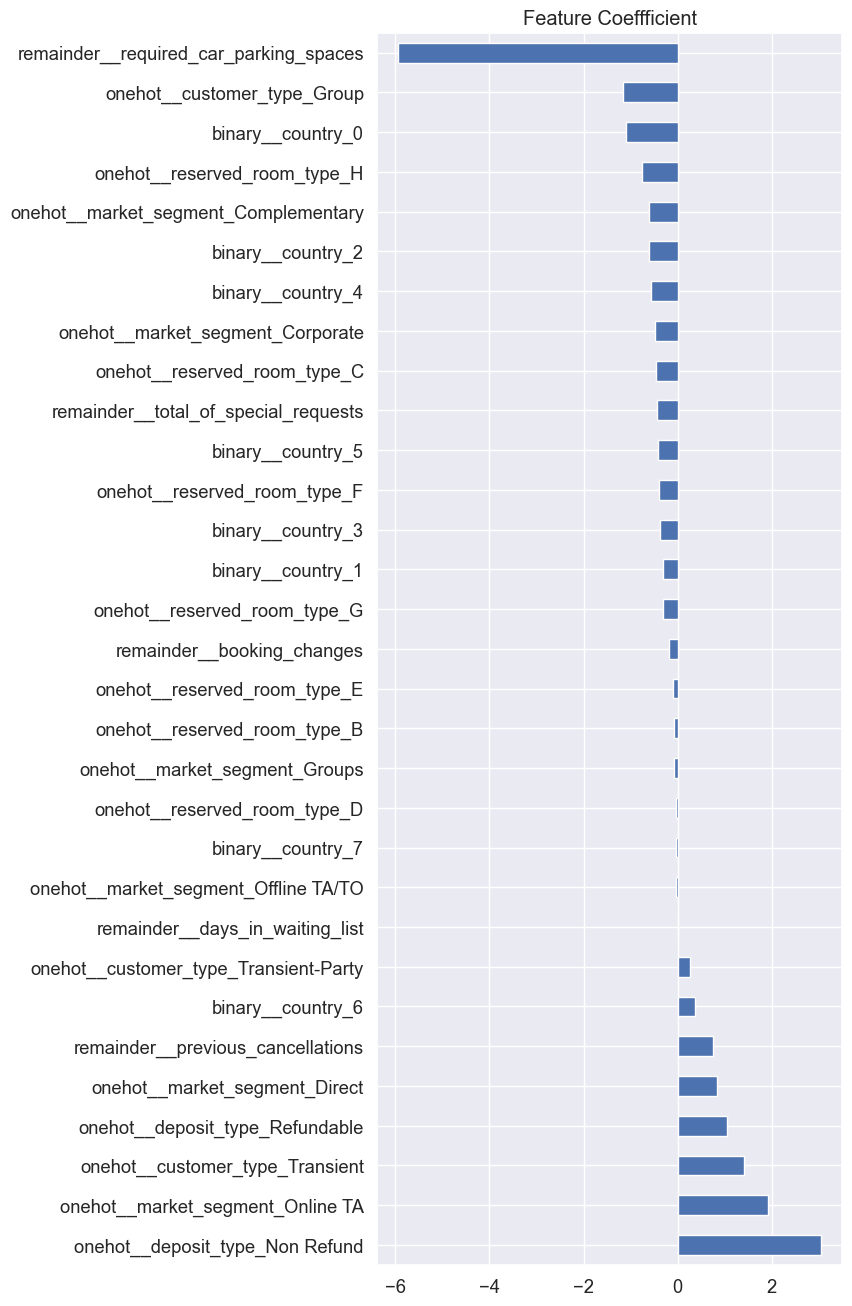

In [334]:
# Plot feature importances
print(logreg_without_scale['modeling'].coef_[0])
feature_imp = pd.Series(logreg_without_scale['modeling'].coef_[0], transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Coeffficient',figsize=(6, 16))

Berbeda dengan Decision Tree nilai yang mana pada Decision Tree nilai dari fitur-fitur dapat bernilai 0 atau dapat tidak digunakan, namun pada logistic regression semua fitur tetap digunakan namun dengan kofisien/bobot tiap fitur yang berbeda - beda. Bobot dari tiap fitur dapat bernilai positif maupun negatif. Nilai positif dan negatif ini akan mempengaruhi pada persamaan log odds, yang mana odds adalah rasio dari probabilitas keberhasilan dengan probabilitas kegagalan, sehingga log odds adalah nilai logaritma dari rasio tersebut. Bobot yang bernilai positif mengindikasi bahwa nilai fitur tersebut terjadi peningkatan yang akan mempengaruhi peningkatan dari probabilitas kelas positif, sementara nilai bobot yang bernilai negatif akan mengimplikasikan penurunan nilai fitur tersebut yang mana akan mempengaruhi kelas lawannya (kelas negatif). Kelas positif dalam kasus ini adalah transaksi gagal dan kelas negatif pada kasus ini adalah transaksii completed

Pada grafik tersebut dapat dilihat bahwa ada 18 fitur yang bobotnya bernilai negatif dan ada 8 fitur yang bobot bernilai positif.

##### *`SHAPLEY VALUE OF EXPLANATIONS (SHAP)`*

In [327]:
trans_resample = Pipeline([
    ('prep', transformer),
    ('resample', smote)
])

X_train_over, y_train_over = trans_resample.fit_resample(X_train, y_train)

In [287]:
logreg_best3['modeling']

LogisticRegression(C=1, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

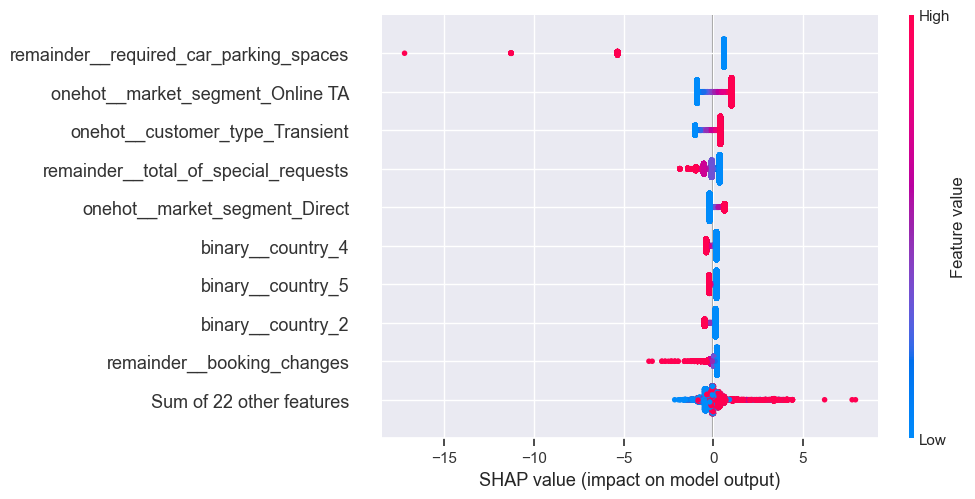

In [335]:
import shap

explainer = shap.Explainer(
    logreg_without_scale['modeling'], X_train_over, feature_names=transformer.get_feature_names_out()
)
shap_values = explainer(X_train_over)

# shap.summary_plot(shap_values[1], X_train_over, feature_names = names)
shap.plots.beeswarm(shap_values)

Berdasarkan nilai SHAP didapatkan fitur fitur yang penting adalah sebagai berikut :
- required_car_parking_spaces (memiliki kontribusi negatif yang lebih besar)
- market_segment_Online TA (memiliki kontribusi positif yang lebih besar)
- total_of_special_requests (memiliki kontribusi negatif yang lebih besar)
- customer_type_Transient (memiliki kontribusi positif yang lebih besar)
- market_segment_Direct (memiliki kontribusi positif yang lebih besar)
- booking_changes (memiliki kontribusi negatif yang lebih besar)

Dalam hal ini memiliki kemiripan dengan bobot pada setiap fitur yang telah diperoleh sebelumnya. Fitur required_car_parking_spaces masih menjadi kontribusi secara negatif terbesar menurut SHAP dan memiliki bobot paling negatif menurut pembobotan tiap fitur.

Selain itu, ada fitur-fitur yang memiliki kontribusi yang rendah
- country_4
- country_5
- country 2
- 22 fitur lainnya

**Interpretasi**

- Pelanggan yang membutuhkan parking spaces lebih dari 0 akan memiliki peluang yang besar untuk melakukan completed transaction, sedangkan pelanggan yang tidak membutuhkan lahan parking memiliki peluang yang besar untuk melakukan cancelation
- Pelanggan yang melakukan transaksi secara online (market_segment_Online TA dipilih 1/yes) memiliki peluang lebih besar untuk melakukan cancelation
- Pelanggan yang special request hanya 1, maka peluang lebih besar untuk melakukan cancelation
- Pelanggan yang bertipe Transient (customer_type adalah Transient) memiliki peluang lebih besar untuk melakukan cancelation
- pelanggan yang bukan bagian dari market segment Diret memiliki peluang lebih besar untuk menyelesaikan transaksi
- Pelanggan yang booking changes 0, memiliki peluang mengagalkan transaksi lebih tinggi


##### *`SHAPLEY VALUE OF EXPLANATIONS (SHAP) PER OBSERVATION FEATURE`*

In [348]:
X_test_over= logreg_without_scale[0].transform(X_test)

In [338]:
shap.initjs()

In [340]:
explainerTest = shap.Explainer(
    logreg_bench['modeling'], X_test_over, feature_names=transformer.get_feature_names_out()
)
shap_valuesTest = explainerTest(X_test_over)

In [344]:
print(f"Berdasarkan data aslinya data ke kedua memilki hasil sebenarnya {y_test.iloc[1]}")
shap.plots.force(shap_valuesTest[1])

Berdasarkan data aslinya data ke kedua memilki hasil sebenarnya 0


Karena memiliki output -4.48 yang mana kurang dari 0, maka model Logistic Regression mendeteksi pelanggan tersebut akan menyelesaikan pembayarannya. Sesuai dengan pada data actual yaitu menyelesaikan pembayaran.

##### *`CONFUSION MATRIX`*

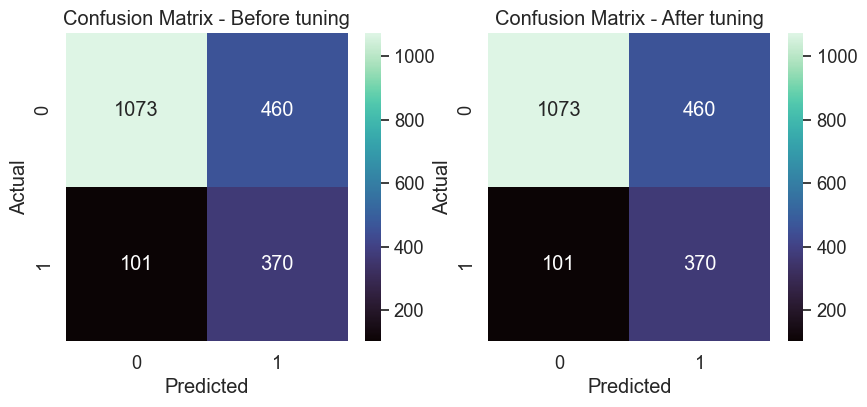

In [349]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_bench_before_tun), annot=True, fmt=".0f", cmap=cmap, ax=axes[0])
axes[0].set_title('Confusion Matrix - Before tuning')
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred_best_logreg_2), annot=True, fmt=".0f", cmap=cmap, ax=axes[1])
axes[1].set_title('Confusion Matrix - After tuning')
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

Hasil tuning Logistic Regression dengan hasil benchmark menunjukkan hasil yang sama, seperti yang sudah dijelaskan sebelumnya

Akan diperhatikan dari confusion matriks setelah tuning.
1. Transaksi yang sebenarnya berhasil tapi di prediksi tidak berhasil ada (False Negative) ada sebanyak 101 orang
2. Transaksi yang sebenarnya berhasil dan di prediski berhasil (True Positive) ada sebanyak 370 orang
3. Transaksi yang sebenarnya tidak berhasil tapi di prediksi berhasil (False Positive) ada sebanyak 460 orang
4. Transaksi yang sebenarnya tidak berhasil tapi di prediksi tidak berhasil (True Negative) ada sebanyak 1073 orang

# **Conclusion and Recomendation**

#### *CONCLUSION*

- Metric utama yang akan kita gunakan adalah recall karena pada kasus ini kita ingin memperkecil FN dengan cara memperbesar hasil dari recall.
    <br>
    <br>
- Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk Decision Tree dengan hasil nilai recall pada data test adalah 0.849256 sebagai berikut :
    - 'modeling__min_samples_split': 35,
    - 'modeling__min_samples_leaf': 15,
    - 'modeling__max_depth': 8
    <br>
    <br>
- Berdasarkan feature importances Decision Tree, fitur yang paling penting/paling berpengaruh adalah required_car_parking_spaces. Selanjutnya ada customer_type_Transient, market_segment_onlineTA, dan seterusnya sampai market_segment_Corporate masih memberikan pengaruh terhadap Decision Tree untuk memnentukan berhasil atau gagalnya transaksi.
    <br>
    <br>
- Hyperparameter tuning model Logistic Regression mendapatkan nilai recall yang sama dengan model benchmark logistic regression. Parameter yang didapatkan hasil dari hyperparameter tuning adalah sebagai berikut :
    - 'modeling__solver': 'liblinear',
    - 'modeling__random_state': 0,
    - 'modeling__intercept_scaling': 1,
    - 'modeling__class_weight': 'balanced',
    - 'modeling__C': 1
    <br>
    <br>
- SHAP telah dicoba dengan menggunakan model logistic regression yang telah dilakukan hyperparameter tuning. Berikut ini adalah hasil interpretasi dari SHAP :
    - Pelanggan yang membutuhkan parking spaces lebih dari 0 akan memiliki peluang yang besar untuk melakukan completed transaction, sedangkan pelanggan yang tidak membutuhkan lahan parking memiliki peluang yang besar untuk melakukan cancelation
    - Pelanggan yang melakukan transaksi secara online (market_segment_Online TA dipilih 1/yes) memiliki peluang lebih besar untuk melakukan cancelation
    - Pelanggan yang special request hanya 1, maka peluang lebih besar untuk melakukan cancelation
    - Pelanggan yang bertipe Transient (customer_type adalah Transient) memiliki peluang lebih besar untuk melakukan cancelation
    - pelanggan yang bukan bagian dari market segment Diret memiliki peluang lebih besar untuk menyelesaikan transaksi
    - Pelanggan yang booking changes 0, memiliki peluang mengagalkan transaksi lebih tinggi

**Model Limitation**

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `country` yang tebatas hanya ada 132 country
* `market_segment` yang hanya terbatas ada 7 jenis
* `previous_cancellations` memiliki nilai diantara 0 dan 5
* `booking_changes` hanya terbatas dengan nilai 0 sampai 21
* `deposit_type`, terbatas hanya ada 3 jenis saja (No Deposit, Non Refund, Refundable)
* `days_in_waiting_list`, hanya terbatas paling lama menunggu adalah 99 hari dan paling cepat 0 hari
* `customer_type`, hanya ada 4 jenis customer (Contract, Group, Transient, Transient-Party)
* `reserved_room_type`, terbatas 8 jenis ruangan yang ada (A, B, C, D, E, F, G, H)
* `required_car_parking_spaces`, hanya diantara 0 - 3 kebutuhan parking spaces yang diminta
* `total_of_special_requests`, hanya diantara 0 - 5 request yang tersedia



Pada kasus ini, hasil analisis dan model yang dibuat tidak valid jika ingin mmenerapkannya pada data diluar data yang telah disebutkan sebelumnya.

#### *RECOMMENDATION*

Hal - hal yang dapat dilakukan agar pelanggan tidak melakukan cancelation
- Memberikan insentif atau reward terhadap pelanggan yang memesan hotel namun tidak membutuhkan parking space. Hal ini bertujuan agar dapat mengurangi pelanggan yang melakukan cancelation dengan kategori tidak membutuhkan parking space
- Memberikan reward kepada pelanggan yang menyelesaikan pembayarannya pada hotel/jenis kamar yang dapat di refund apabila di cancel.
- Memberikan potongan harga kepada pelanggan yang memesan melalui online agar banyak pelanggan yang tertarik dan tidak melakukan cancelation.

Hal - hal yang dapat dilakukan agar project ini lebih baik lagi
- Memberikan fitur - fitur baru yang dapat menunjang alasan transaksi berhasil atau tidak.
- Menambahkan data pada bagian pelanggan yang melakukan cancelation agar data yang dimiliki lebih seimbang.
- Menggunakan metode machine learning yang berbeda (Gradient Boosting, Naive Bayes, dll)
- Menggunakan metode hyperparameter tuning yang berbeda seperti menggunakan GridSearch
- Menggunakan oversampling yang berbeda, seperti ADASYN, Random Oversampling, dll

#### *SAVE FINAL MODEL*

In [ ]:
import pickle

# fit
best_tree.fit(X, y)

# save with pickle
pickle.dump(best_tree, open('best_model_decisiontree.sav', 'wb'))

In [ ]:
# fit
logreg_without_scale.fit(X, y)

# save with pickle
pickle.dump(logreg_without_scale, open('best_model_logreg.sav', 'wb'))